In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print(f"\nMissing values: {df.isnull().sum().sum()}")

Dataset Shape: (200, 5)

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB



EXPLORATORY DATA ANALYSIS


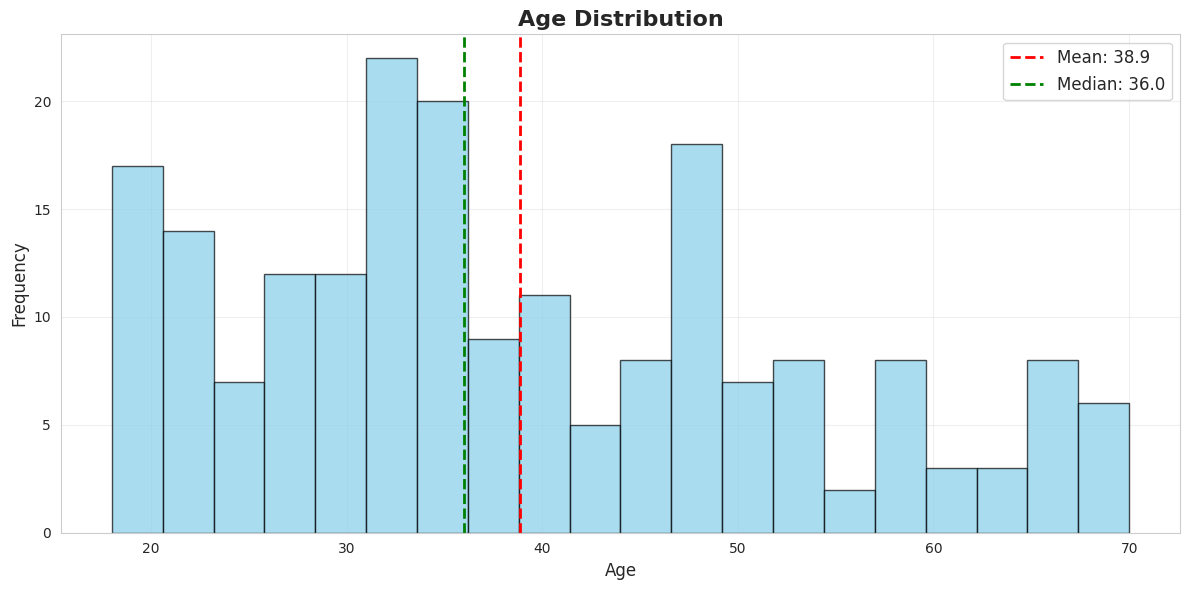

In [4]:
# 1. EXPLORATORY DATA ANALYSIS
# ============================================================================

print("\n" + "="*70)
print("EXPLORATORY DATA ANALYSIS")
print("="*70)

# Plot 1: Age distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2,
           label=f'Median: {df["Age"].median():.1f}')
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


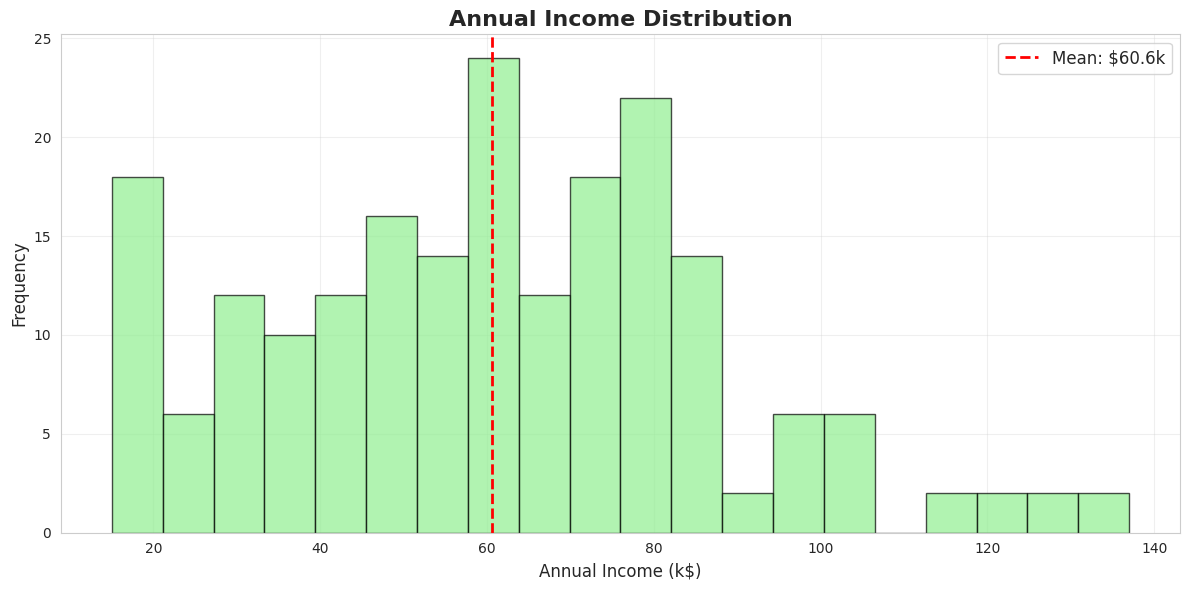

In [5]:
plt.figure(figsize=(12, 6))
plt.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
plt.title('Annual Income Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

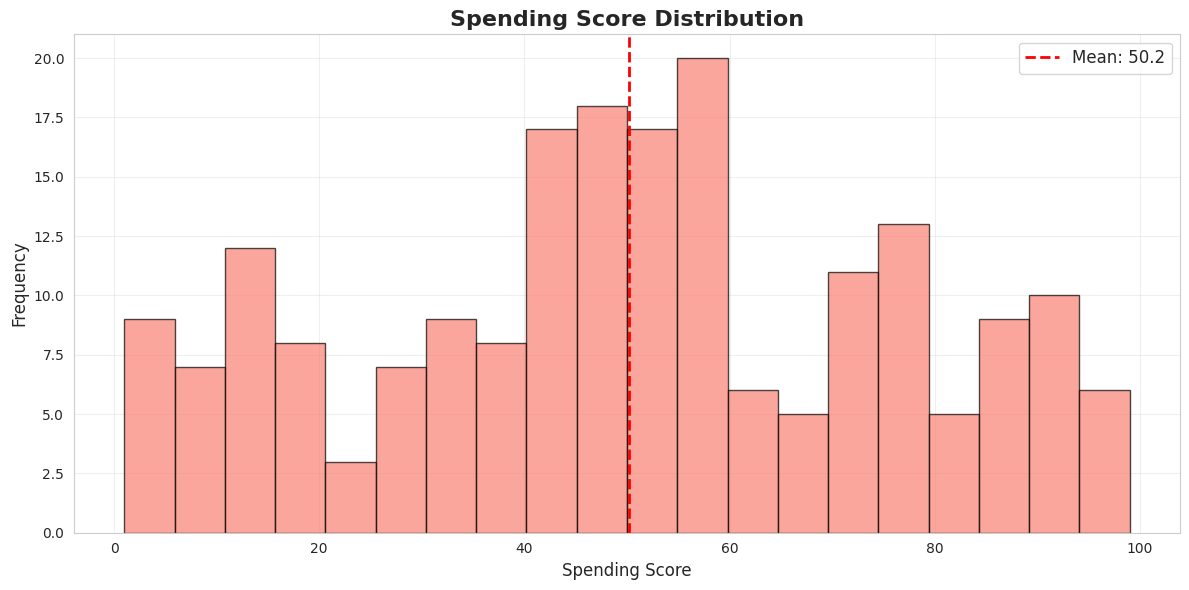

In [6]:
# Plot 3: Spending Score distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
plt.title('Spending Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

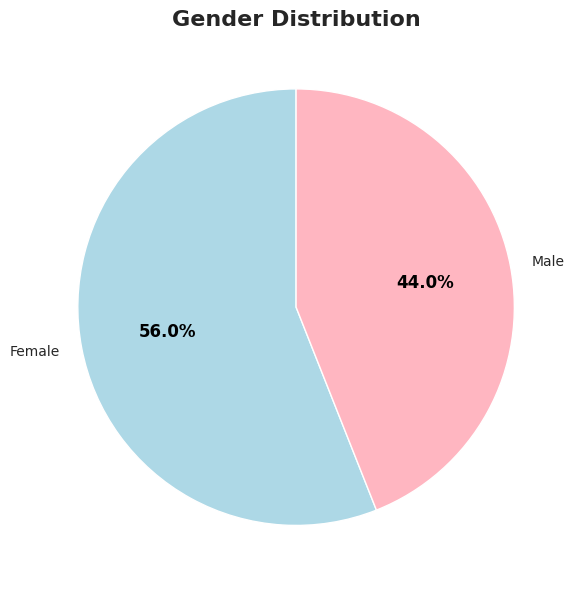

In [7]:
# Plot 4: Gender distribution
plt.figure(figsize=(10, 6))
gender_counts = df['Gender'].value_counts()
colors = ['lightblue', 'lightpink']
wedges, texts, autotexts = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
                                     colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

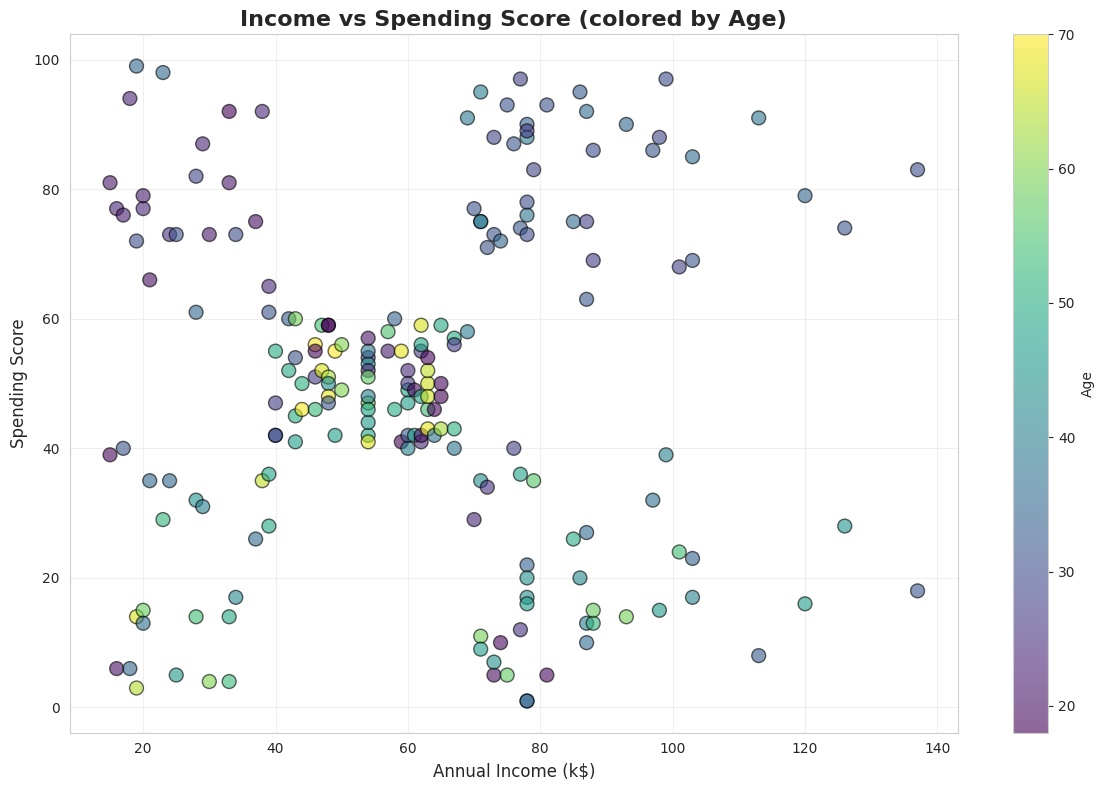

In [8]:
# Plot 5: Income vs Spending Score (colored by Age)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Age'], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Age')
plt.title('Income vs Spending Score (colored by Age)', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


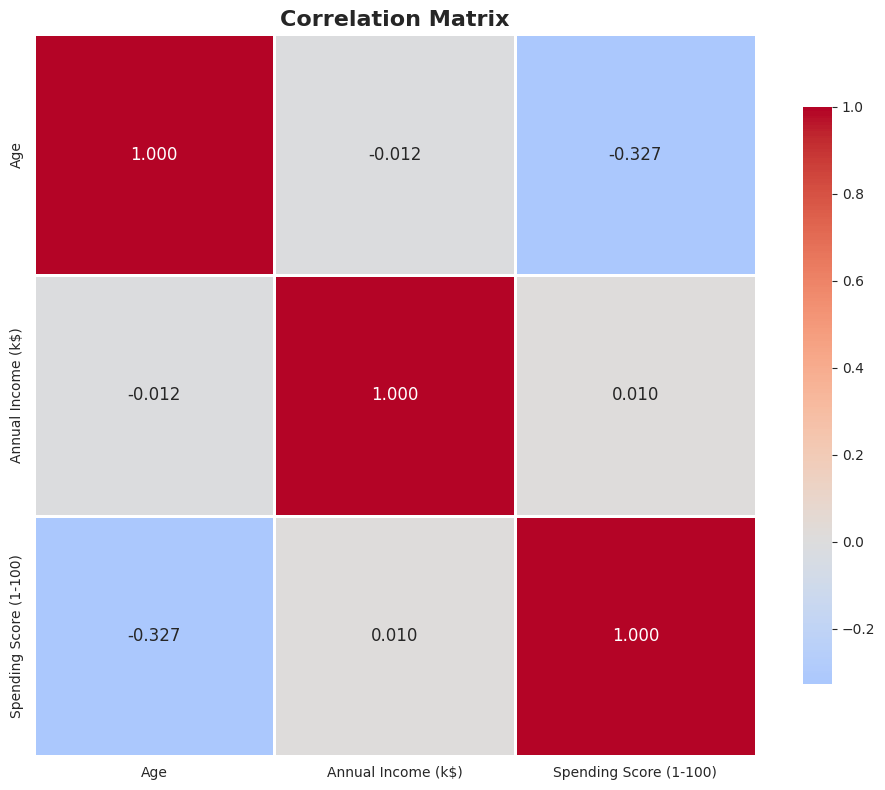

In [9]:
# Plot 6: Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'size': 12})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


In [10]:
# ============================================================================
# 2. DATA PREPROCESSING
# ============================================================================

print("\n" + "="*70)
print("DATA PREPROCESSING")
print("="*70)

# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Check for missing values
print(f"Missing values in features: {np.isnan(X).sum()}")


DATA PREPROCESSING
Missing values in features: 0


In [11]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled Data Shape: {X_scaled.shape}")
print(f"Features: Age, Annual Income, Spending Score")

Scaled Data Shape: (200, 3)
Features: Age, Annual Income, Spending Score


In [12]:
# ============================================================================
# 3. OPTIMAL NUMBER OF CLUSTERS (ELBOW & SILHOUETTE)
# ============================================================================

print("\n" + "="*70)
print("FINDING OPTIMAL NUMBER OF CLUSTERS")
print("="*70)

# Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


FINDING OPTIMAL NUMBER OF CLUSTERS


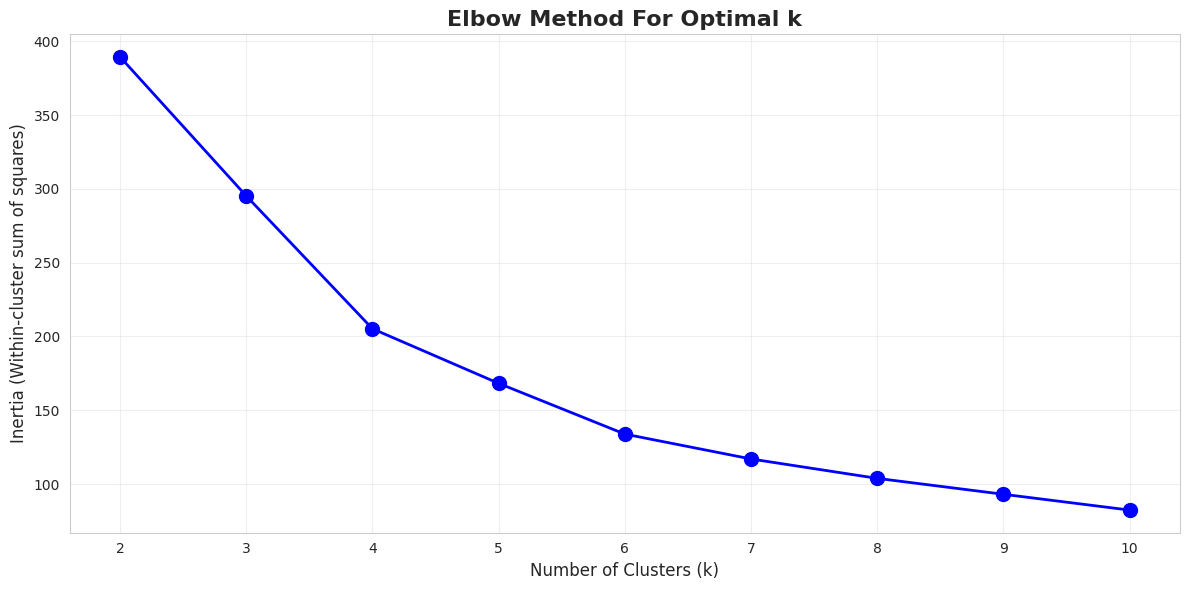

In [13]:
# Plot 1: Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
plt.title('Elbow Method For Optimal k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

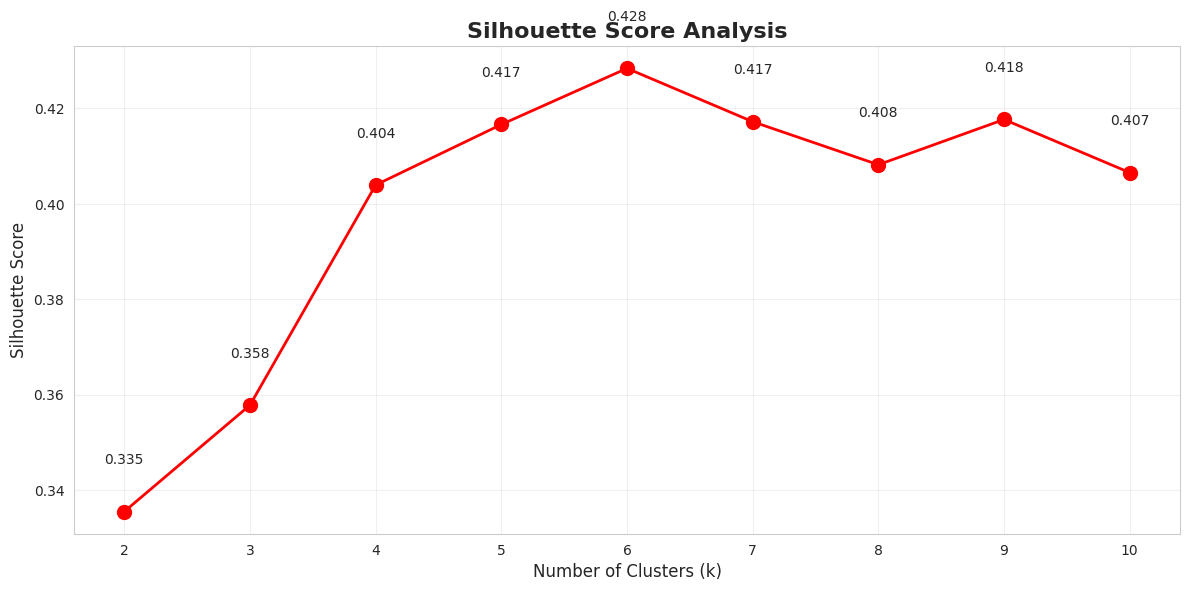


Optimal number of clusters based on Silhouette Score: 6


In [15]:
 #Plot 2: Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=10)
plt.title('Silhouette Score Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(K_range)
for i, score in enumerate(silhouette_scores):
    plt.text(K_range[i], score + 0.01, f'{score:.3f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

In [16]:
# ============================================================================
# 4. K-MEANS CLUSTERING
# ============================================================================

print("\n" + "="*70)
print("K-MEANS CLUSTERING")
print("="*70)

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_db:.4f} (lower is better)")
print(f"Calinski-Harabasz Index: {kmeans_ch:.4f} (higher is better)")

df['KMeans_Cluster'] = kmeans_labels

# Cluster analysis
print("\nCluster Statistics:")
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})
print(cluster_summary.round(2))



K-MEANS CLUSTERING
Silhouette Score: 0.4166
Davies-Bouldin Index: 0.8746 (lower is better)
Calinski-Harabasz Index: 125.1009 (higher is better)

Cluster Statistics:
                  Age  Annual Income (k$)  Spending Score (1-100)  Count
KMeans_Cluster                                                          
0               46.25               26.75                   18.35     20
1               25.19               41.09                   62.24     54
2               32.88               86.10                   81.53     40
3               39.87               86.10                   19.36     39
4               55.64               54.38                   48.85     47


In [17]:
# ============================================================================
# 5. DBSCAN CLUSTERING
# ============================================================================

print("\n" + "="*70)
print("DBSCAN CLUSTERING")
print("="*70)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")

if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_data = X_scaled[dbscan_labels != -1]
    if len(valid_labels) > 0:
        dbscan_silhouette = silhouette_score(valid_data, valid_labels)
        print(f"Silhouette Score: {dbscan_silhouette:.4f}")
    else:
        dbscan_silhouette = 0
else:
    dbscan_silhouette = 0

df['DBSCAN_Cluster'] = dbscan_labels




DBSCAN CLUSTERING
Number of clusters: 6
Number of noise points: 60
Silhouette Score: 0.4817



HIERARCHICAL CLUSTERING
Silhouette Score: 0.3900


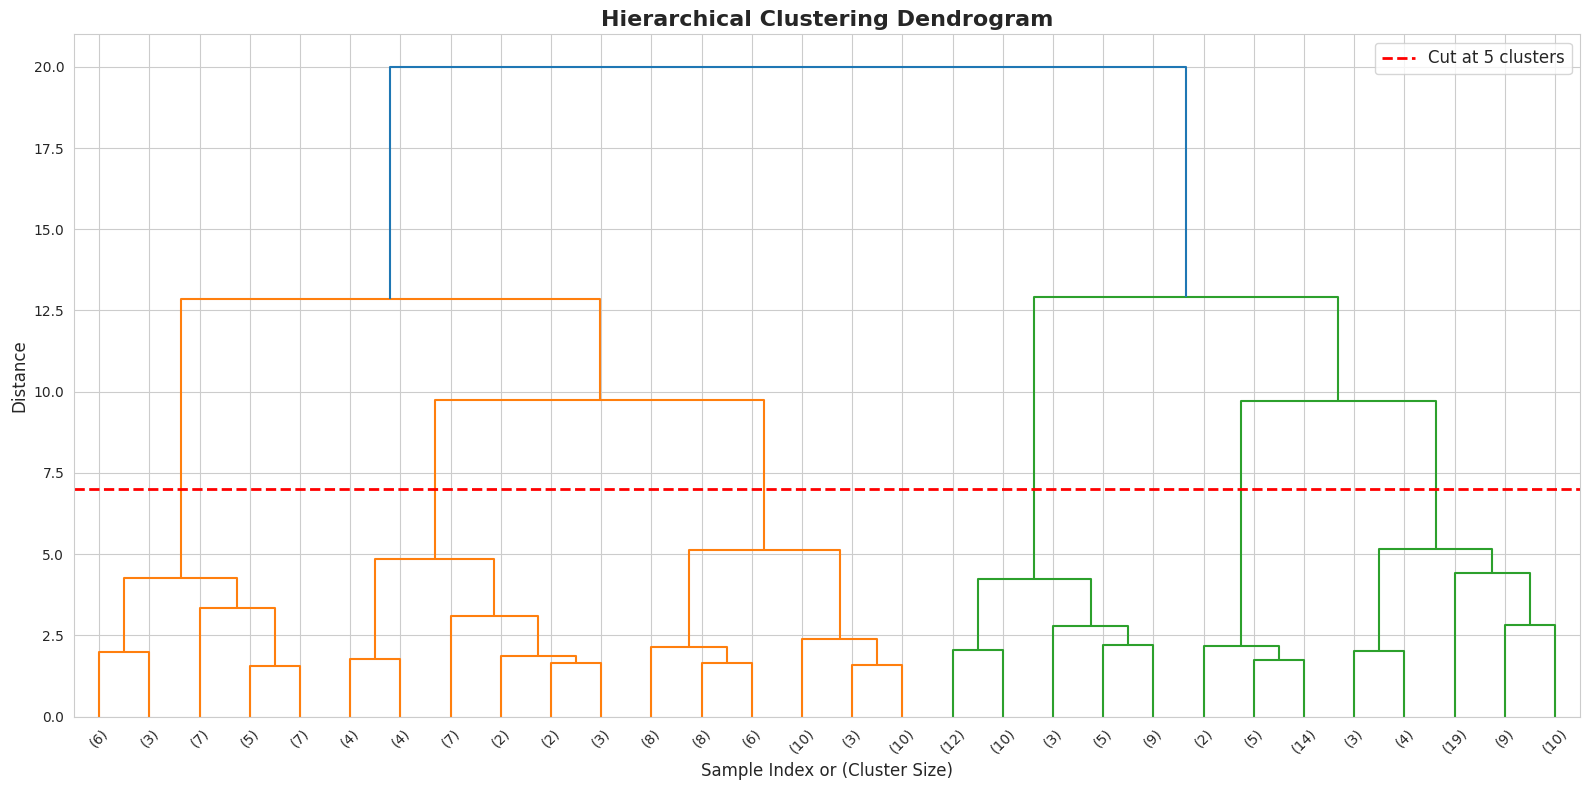

In [18]:
# ============================================================================
# 6. HIERARCHICAL CLUSTERING
# ============================================================================

print("\n" + "="*70)
print("HIERARCHICAL CLUSTERING")
print("="*70)

hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")

df['Hierarchical_Cluster'] = hierarchical_labels

# Plot: Dendrogram
plt.figure(figsize=(16, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=7, color='r', linestyle='--', linewidth=2, label='Cut at 5 clusters')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

In [19]:
# ============================================================================
# 7. DIMENSIONALITY REDUCTION & VISUALIZATION
# ============================================================================

print("\n" + "="*70)
print("DIMENSIONALITY REDUCTION")
print("="*70)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.4f}")



DIMENSIONALITY REDUCTION
PCA Explained Variance Ratio: [0.44266167 0.33308378]
Total Variance Explained: 0.7757


In [20]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
print("t-SNE transformation complete")


t-SNE transformation complete


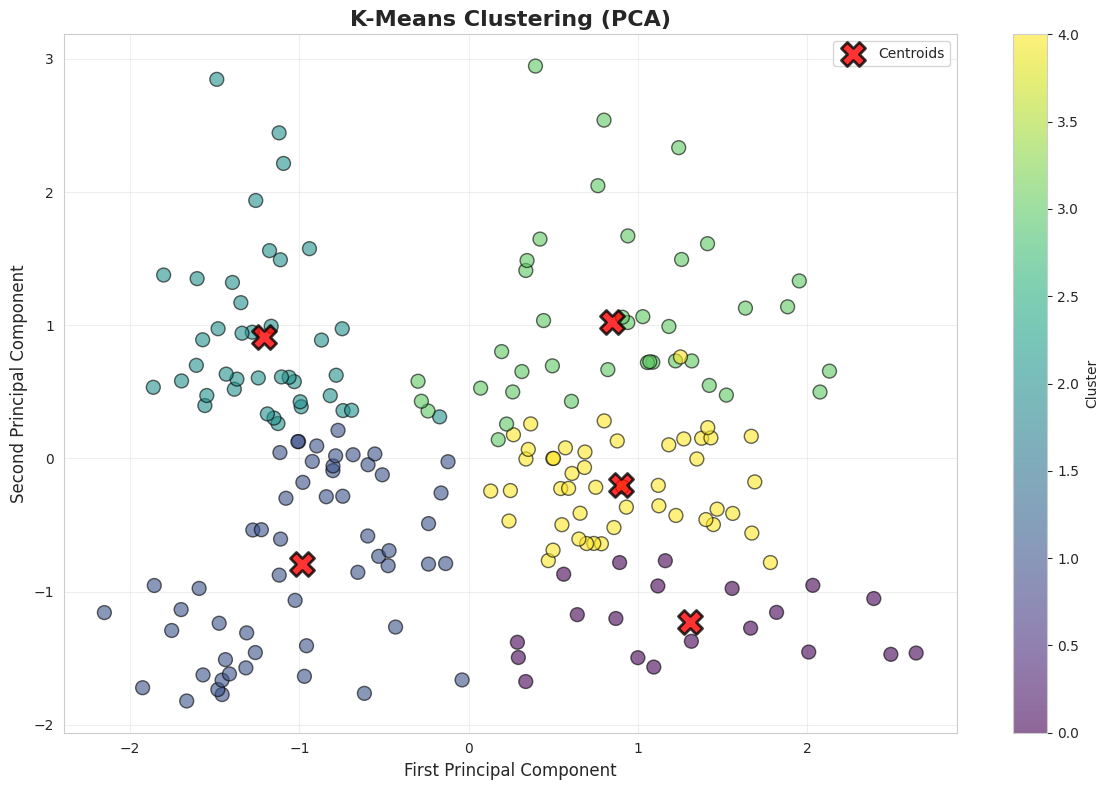

In [23]:
# Plot 1: K-Means with PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidths=2,
           label='Centroids')
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering (PCA)', fontsize=16, fontweight='bold')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



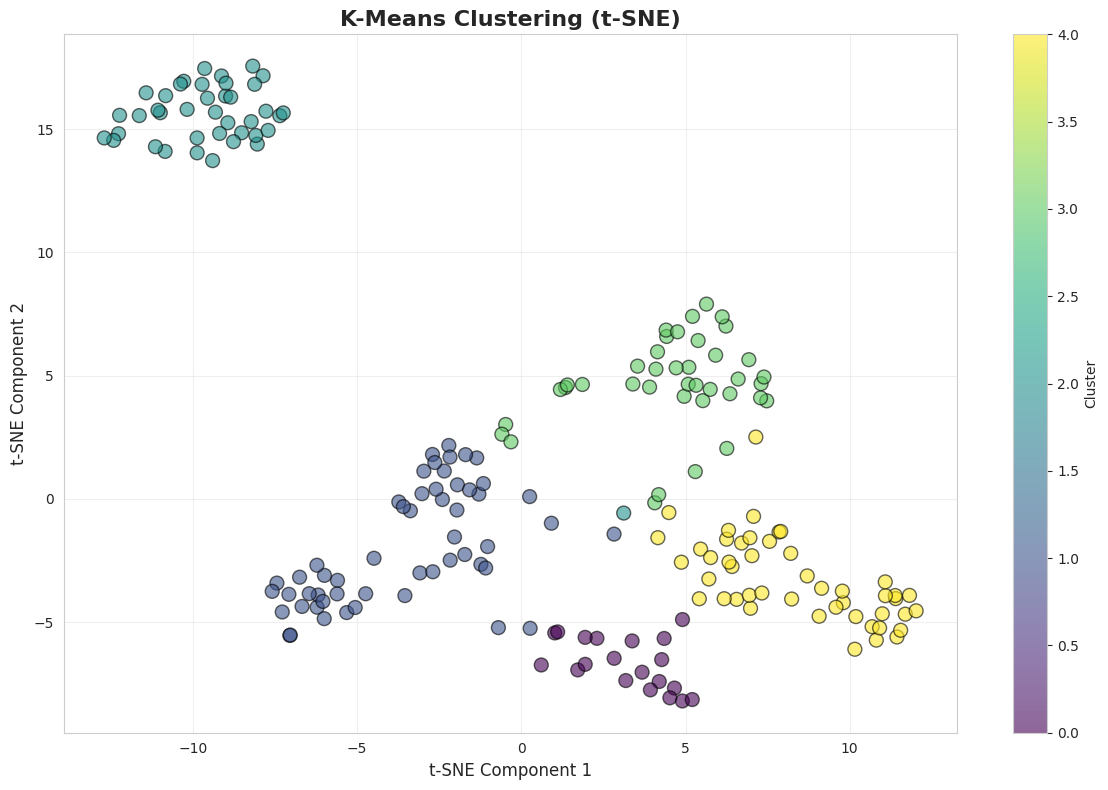

In [22]:
# Plot 2: K-Means with t-SNE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering (t-SNE)', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


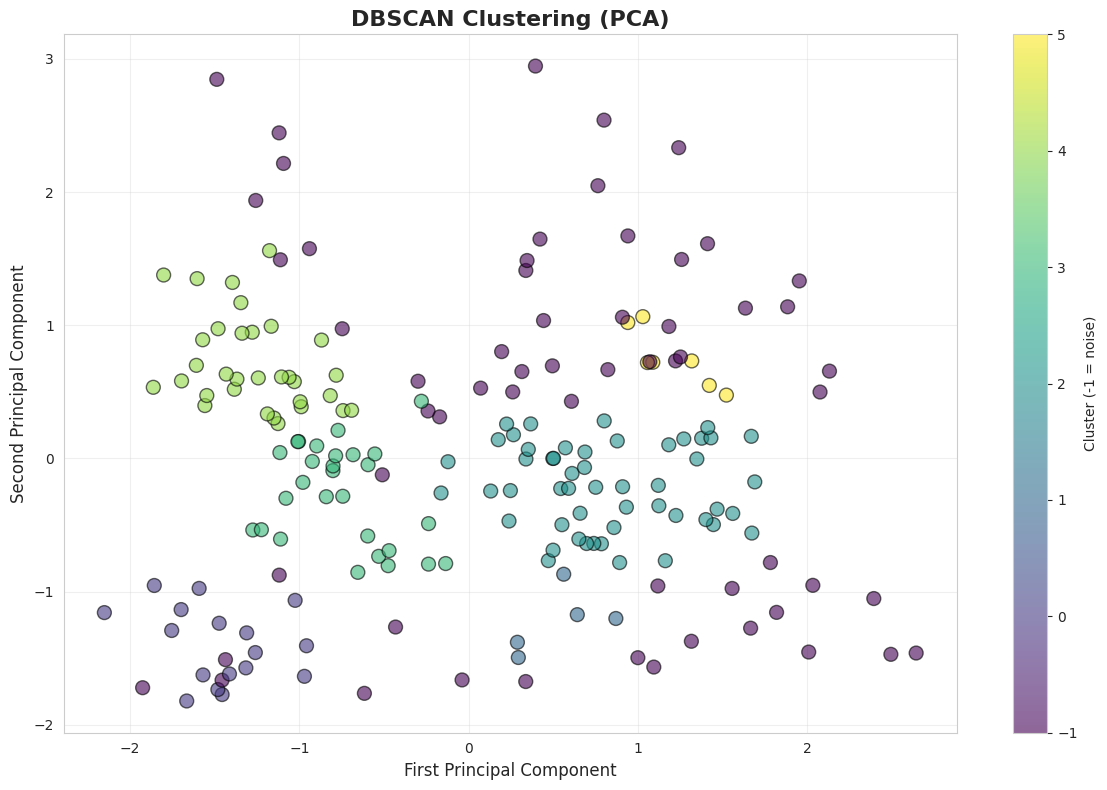

In [24]:

# Plot 3: DBSCAN with PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster (-1 = noise)')
plt.title('DBSCAN Clustering (PCA)', fontsize=16, fontweight='bold')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



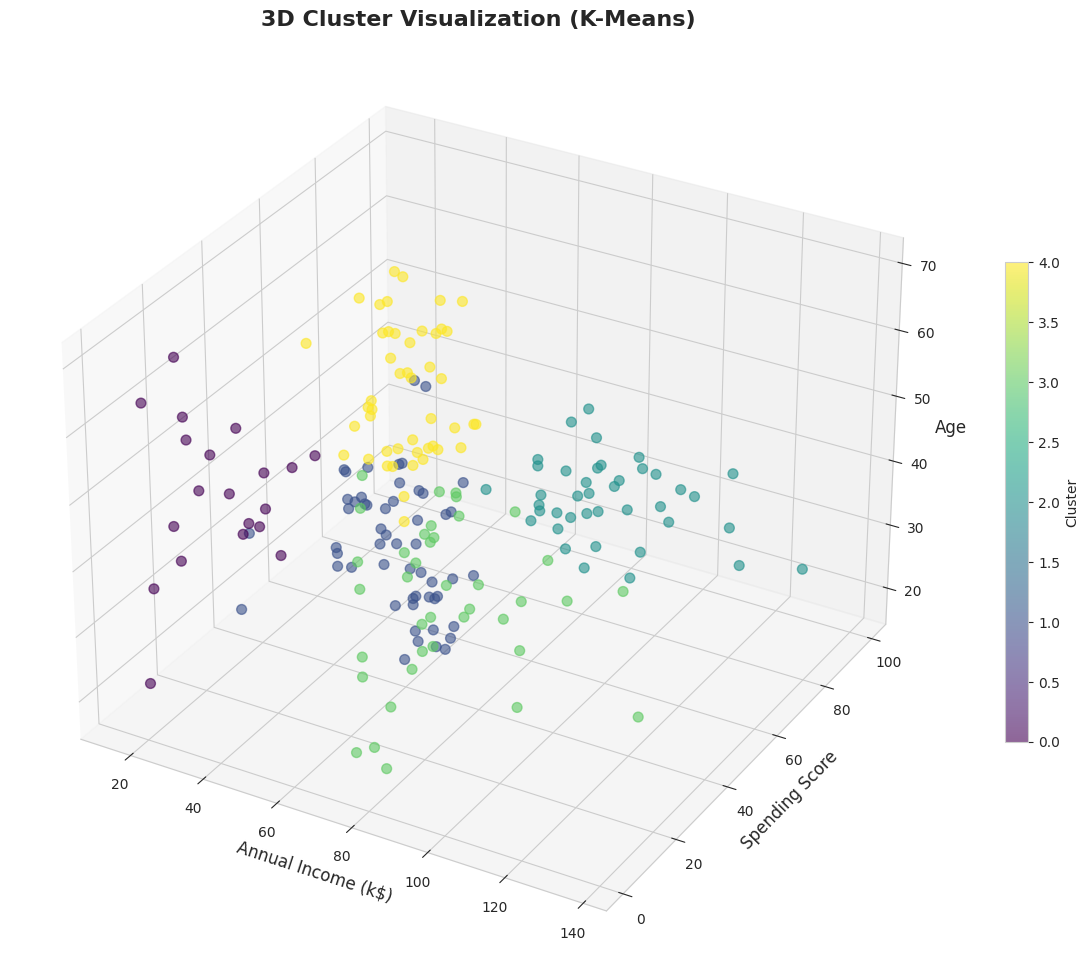

In [25]:
# Plot 4: 3D scatter - Income vs Spending vs Age
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                    df['Age'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
ax.set_xlabel('Annual Income (k$)', fontsize=12)
ax.set_ylabel('Spending Score', fontsize=12)
ax.set_zlabel('Age', fontsize=12)
ax.set_title('3D Cluster Visualization (K-Means)', fontsize=16, fontweight='bold')
plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.5)
plt.tight_layout()
plt.show()

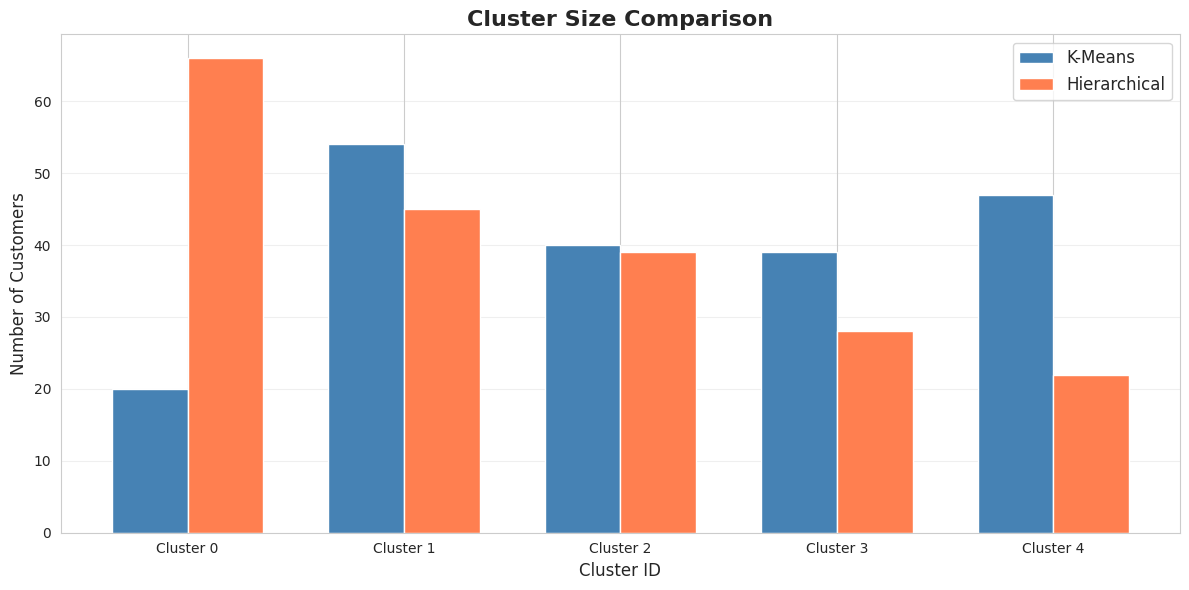

In [26]:
# Plot 5: Cluster size comparison
plt.figure(figsize=(12, 6))
cluster_sizes_kmeans = pd.Series(kmeans_labels).value_counts().sort_index()
cluster_sizes_hier = pd.Series(hierarchical_labels).value_counts().sort_index()

x_pos = np.arange(5)
width = 0.35

plt.bar(x_pos - width/2, cluster_sizes_kmeans.values, width, label='K-Means', color='steelblue')
plt.bar(x_pos + width/2, cluster_sizes_hier.values, width, label='Hierarchical', color='coral')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Cluster Size Comparison', fontsize=16, fontweight='bold')
plt.xticks(x_pos, [f'Cluster {i}' for i in range(5)])
plt.legend(fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

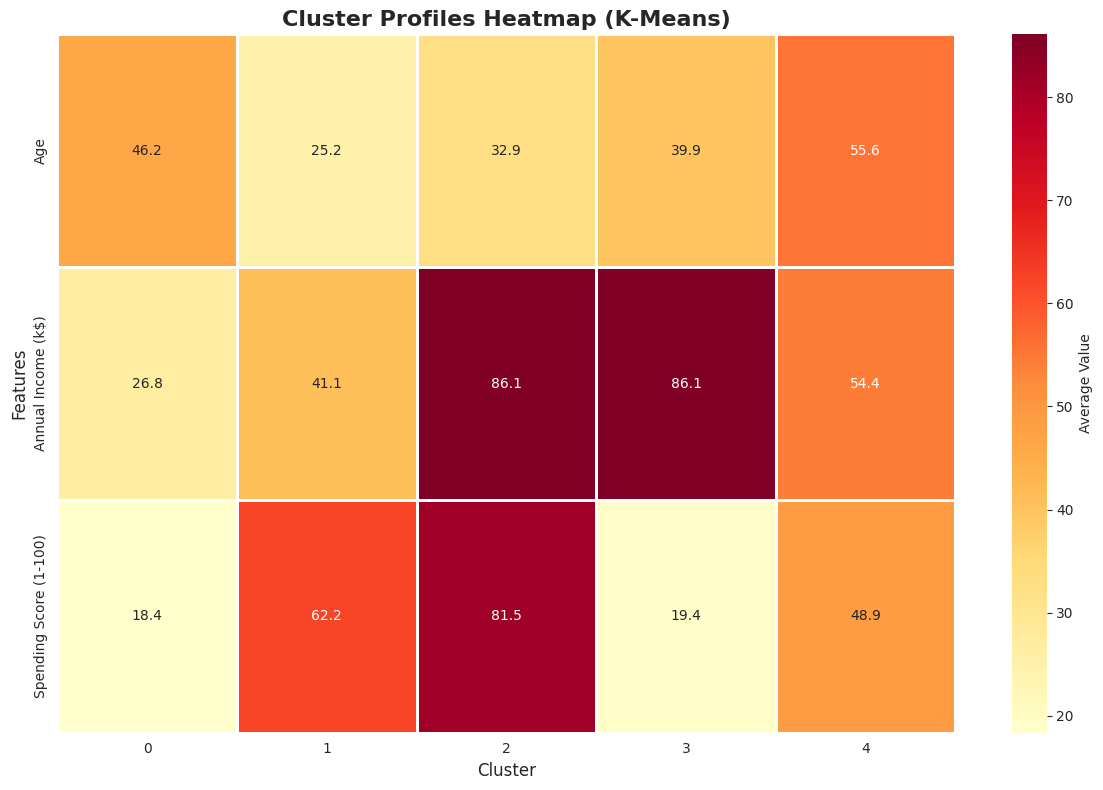

In [27]:
# Plot 6: Cluster profiles heatmap
plt.figure(figsize=(12, 8))
cluster_profiles = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
sns.heatmap(cluster_profiles.T, annot=True, fmt='.1f', cmap='YlOrRd',
            linewidths=2, cbar_kws={'label': 'Average Value'})
plt.title('Cluster Profiles Heatmap (K-Means)', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.tight_layout()
plt.show()


In [28]:
# ============================================================================
# 8. BUSINESS INSIGHTS & RECOMMENDATIONS
# ============================================================================

print("\n" + "="*70)
print("CLUSTER PROFILES & BUSINESS INSIGHTS")
print("="*70)

for cluster in range(5):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    print(f"\n{'='*70}")
    print(f"📊 CLUSTER {cluster} - {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"{'='*70}")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    print(f"  Gender Split: {cluster_data['Gender'].value_counts().to_dict()}")



CLUSTER PROFILES & BUSINESS INSIGHTS

📊 CLUSTER 0 - 20 customers (10.0%)
  Average Age: 46.2 years
  Average Income: $26.8k
  Average Spending Score: 18.4/100
  Gender Split: {'Female': 12, 'Male': 8}

📊 CLUSTER 1 - 54 customers (27.0%)
  Average Age: 25.2 years
  Average Income: $41.1k
  Average Spending Score: 62.2/100
  Gender Split: {'Female': 32, 'Male': 22}

📊 CLUSTER 2 - 40 customers (20.0%)
  Average Age: 32.9 years
  Average Income: $86.1k
  Average Spending Score: 81.5/100
  Gender Split: {'Female': 22, 'Male': 18}

📊 CLUSTER 3 - 39 customers (19.5%)
  Average Age: 39.9 years
  Average Income: $86.1k
  Average Spending Score: 19.4/100
  Gender Split: {'Male': 20, 'Female': 19}

📊 CLUSTER 4 - 47 customers (23.5%)
  Average Age: 55.6 years
  Average Income: $54.4k
  Average Spending Score: 48.9/100
  Gender Split: {'Female': 27, 'Male': 20}


In [30]:
# Segment naming and strategy
avg_income = cluster_data['Annual Income (k$)'].mean()
avg_spending = cluster_data['Spending Score (1-100)'].mean()

if avg_income > 60 and avg_spending > 60:
    print(f"  💎 Segment: HIGH VALUE CUSTOMERS")
    print(f"  Strategy: Premium products, loyalty programs, VIP treatment")
elif avg_income > 60 and avg_spending < 40:
    print(f"  🎯 Segment: HIGH INCOME, LOW SPENDERS")
    print(f"  Strategy: Targeted marketing, incentives, personalized offers")
elif avg_income < 40 and avg_spending > 60:
    print(f"  ⚠️ Segment: LOW INCOME, HIGH SPENDERS")
    print(f"  Strategy: Budget-friendly options, payment plans, risk monitoring")
elif avg_income < 40 and avg_spending < 40:
    print(f"  💰 Segment: BUDGET CONSCIOUS")
    print(f"  Strategy: Discounts, value deals, cost-effective products")
else:
    print(f"  📌 Segment: AVERAGE CUSTOMERS")
    print(f"  Strategy: Standard marketing, seasonal promotions")

print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN', 'Hierarchical'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette],
    'N_Clusters': [5, n_clusters_dbscan, 5]
})
print(comparison_df.round(4).to_string(index=False))

print("\n" + "="*70)
print("NOTEBOOK COMPLETE ✓")
print("="*70)

  📌 Segment: AVERAGE CUSTOMERS
  Strategy: Standard marketing, seasonal promotions

MODEL COMPARISON SUMMARY
       Model  Silhouette Score  N_Clusters
     K-Means            0.4166           5
      DBSCAN            0.4817           6
Hierarchical            0.3900           5

NOTEBOOK COMPLETE ✓


# Task
Create a Streamlit application that provides an interactive dashboard for customer segmentation analysis. The app should load the `Mall_Customers.csv` dataset, allow users to explore distributions of `Age`, `Annual Income (k$)`, and `Spending Score (1-100)`, visualize the correlation matrix, and perform K-Means clustering. Users should be able to select the number of K-Means clusters and visualize the results using PCA, t-SNE, 3D scatter plots, and cluster profiles heatmap. The app should also display business insights and recommendations for each identified customer segment. Finally, provide instructions on how to run and deploy this Streamlit application.

## Extract Relevant Code

### Subtask:
Extract all necessary Python code from the current notebook, including data loading, preprocessing, clustering, and visualization logic. This will involve consolidating functions and variables used across multiple cells.


**Reasoning**:
To fulfill the subtask of extracting all necessary Python code, I will consolidate all code from the existing notebook cells into a single code block. This includes imports, data loading, preprocessing, clustering, dimensionality reduction, visualization, and business insights generation.



Dataset Shape: (200, 5)

First few rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


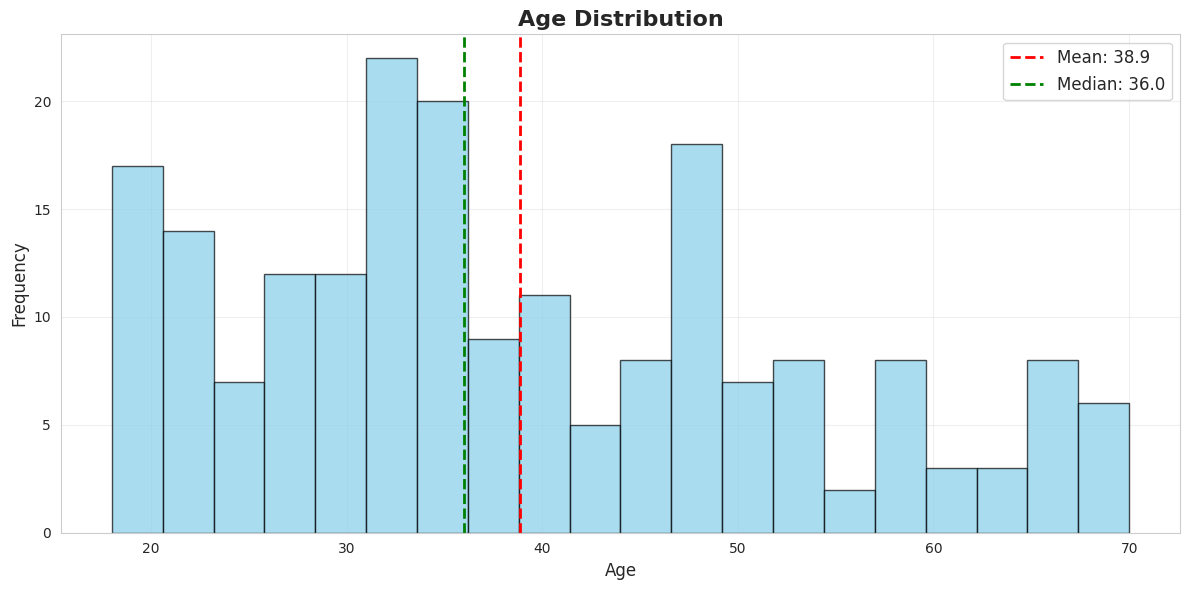

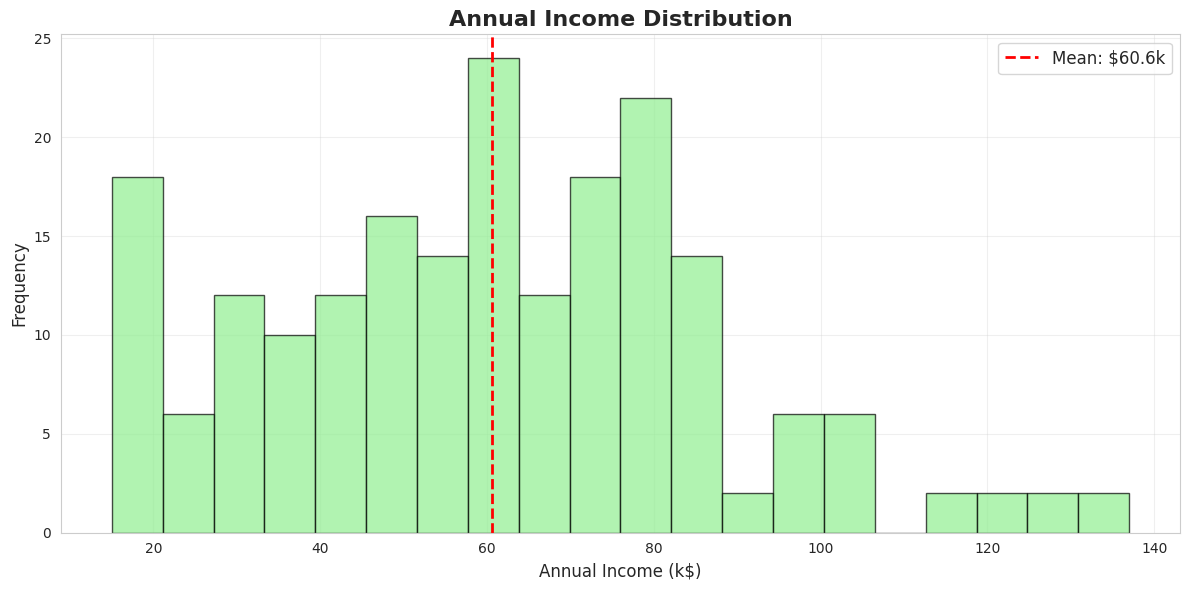

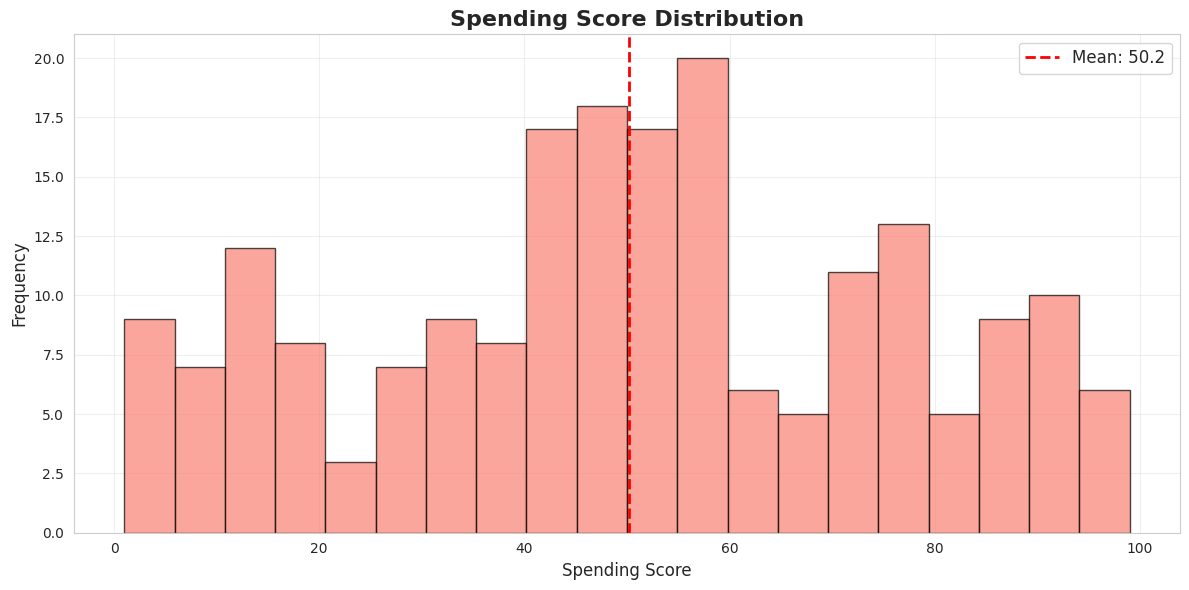

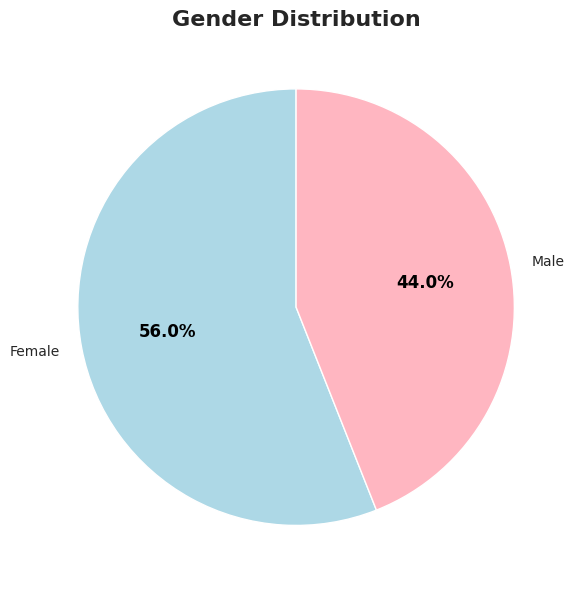

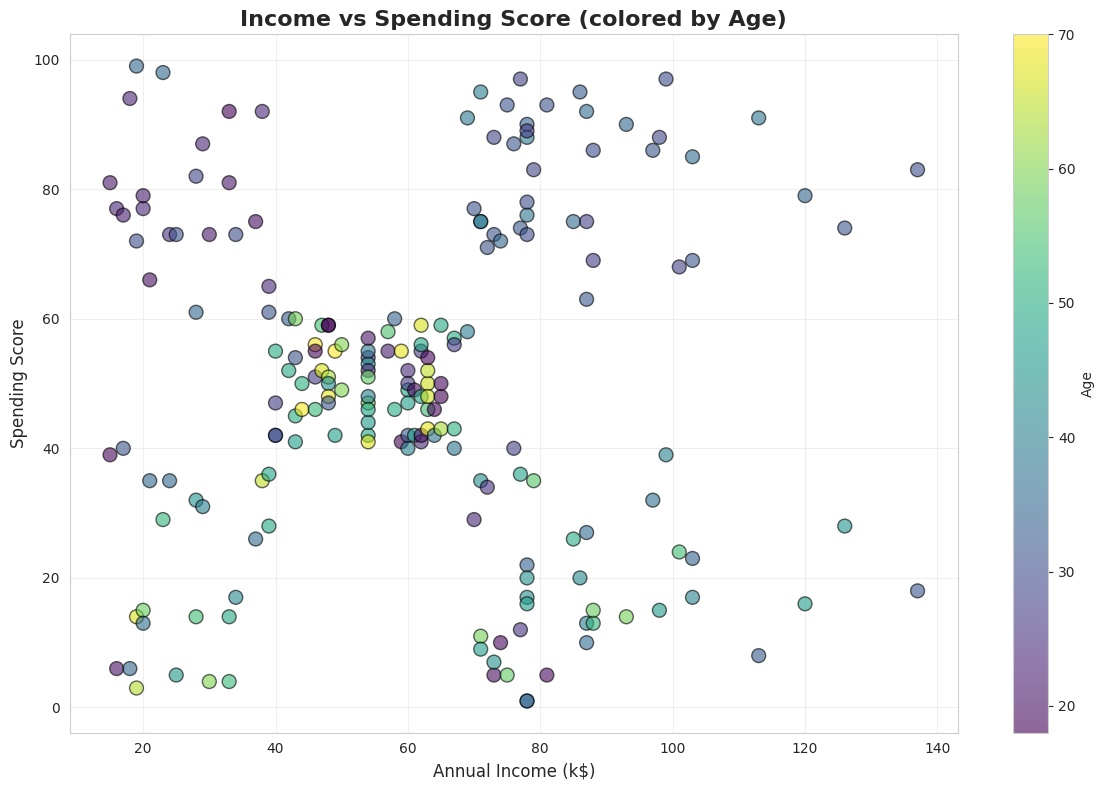

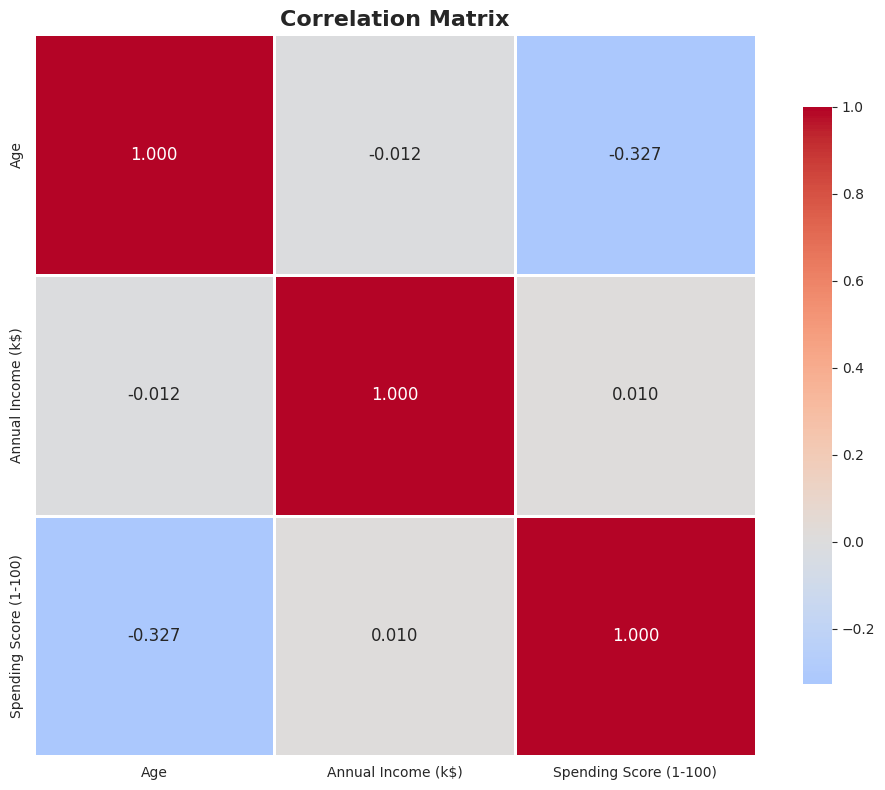

Missing values in features: 0
Scaled Data Shape: (200, 3)
Features: Age, Annual Income, Spending Score


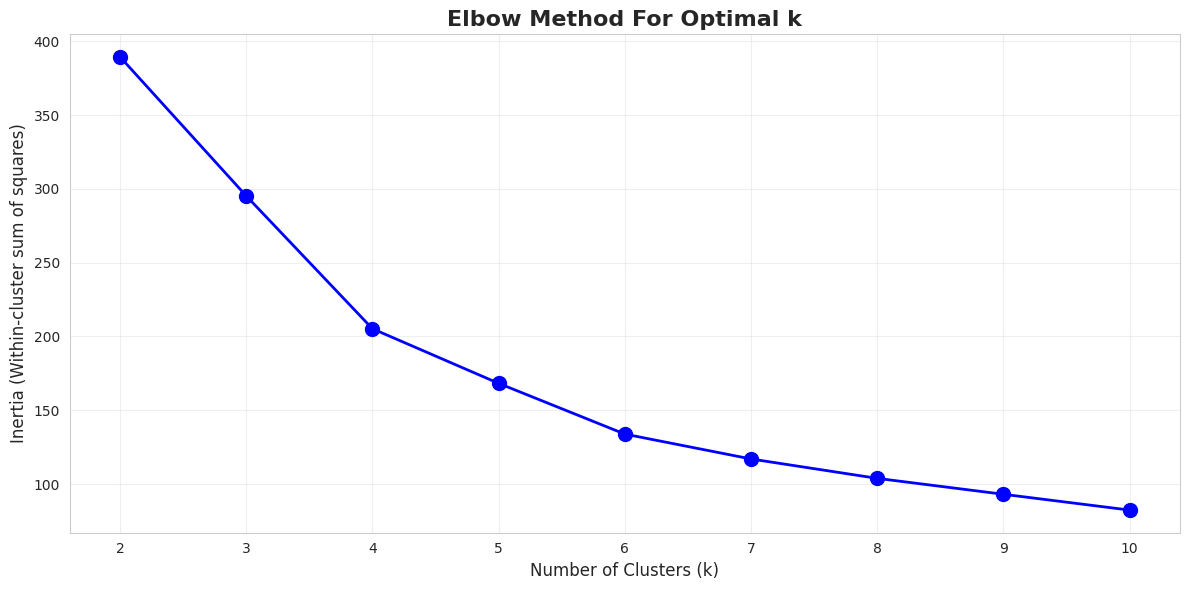

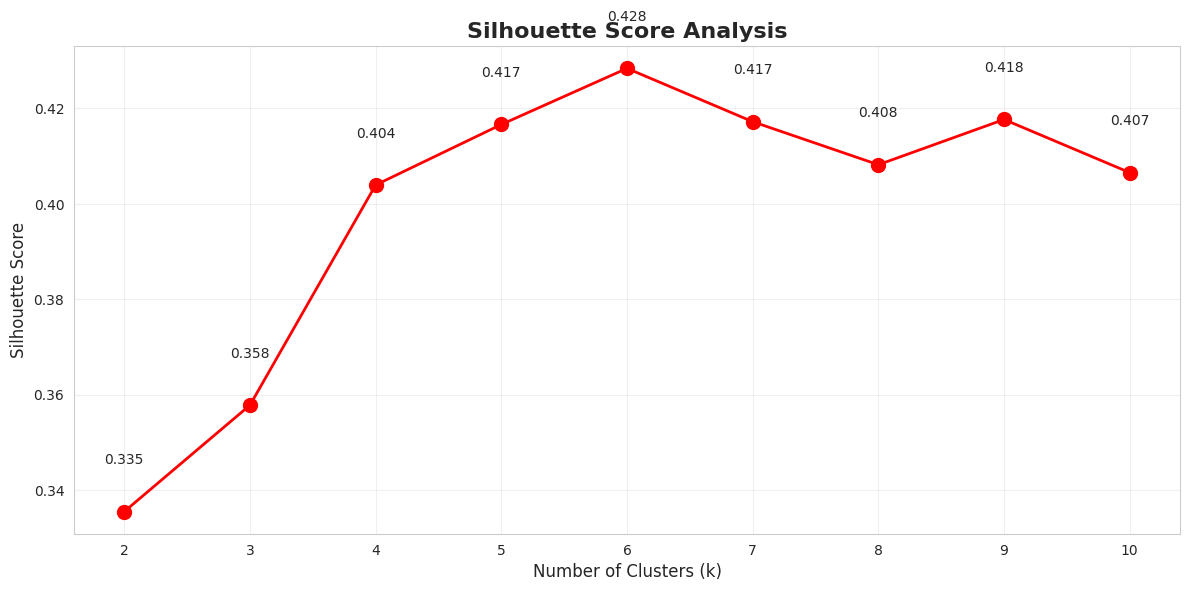


Optimal number of clusters based on Silhouette Score: 6
Silhouette Score: 0.4166
Davies-Bouldin Index: 0.8746 (lower is better)
Calinski-Harabasz Index: 125.1009 (higher is better)

Cluster Statistics:
                  Age  Annual Income (k$)  Spending Score (1-100)  Count
KMeans_Cluster                                                          
0               46.25               26.75                   18.35     20
1               25.19               41.09                   62.24     54
2               32.88               86.10                   81.53     40
3               39.87               86.10                   19.36     39
4               55.64               54.38                   48.85     47
Number of clusters: 6
Number of noise points: 60
Silhouette Score: 0.4817
Silhouette Score: 0.3900


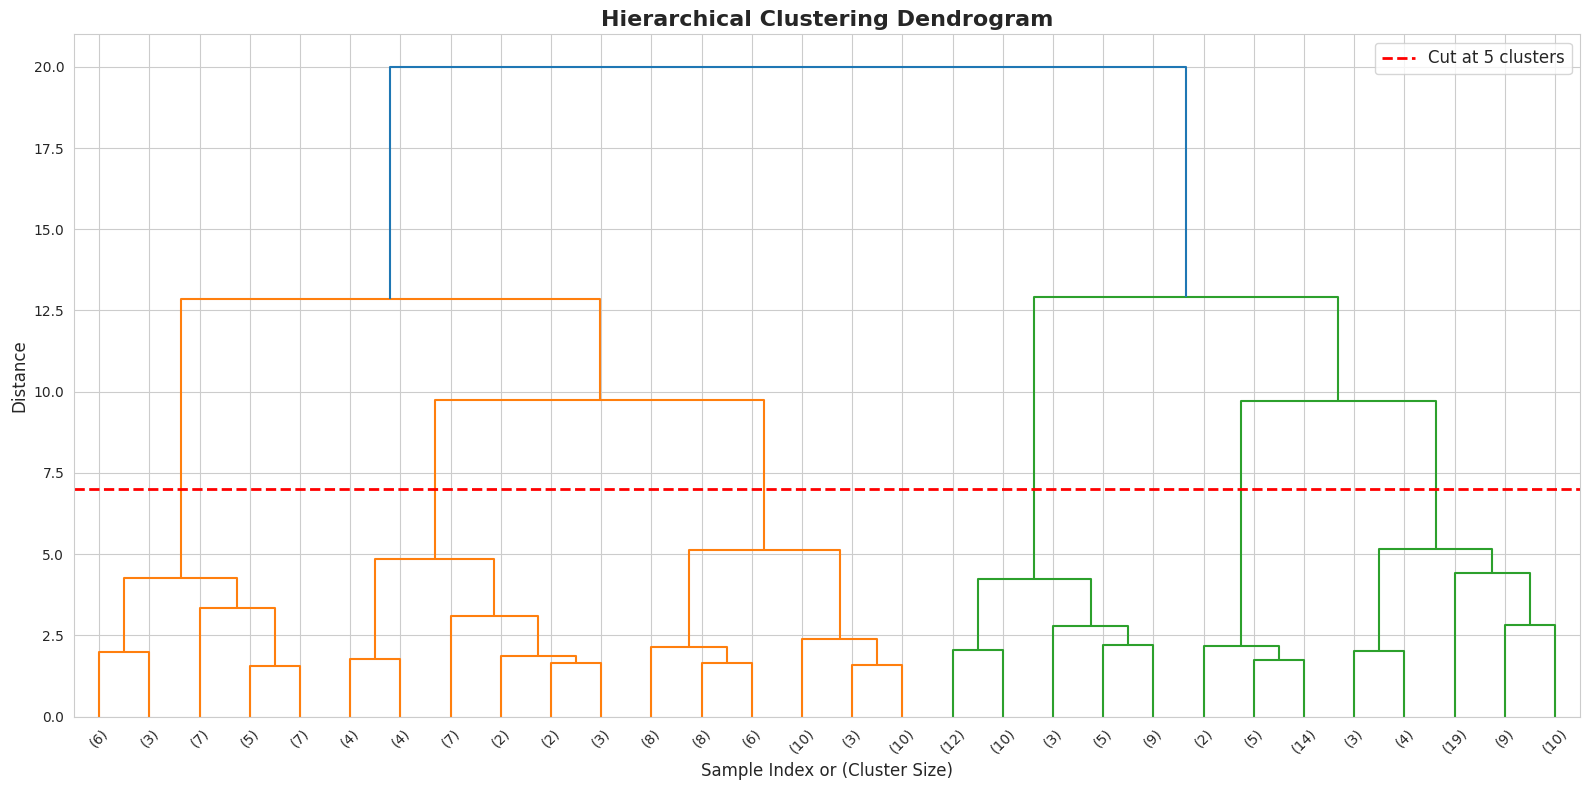

PCA Explained Variance Ratio: [0.44266167 0.33308378]
Total Variance Explained: 0.7757
t-SNE transformation complete


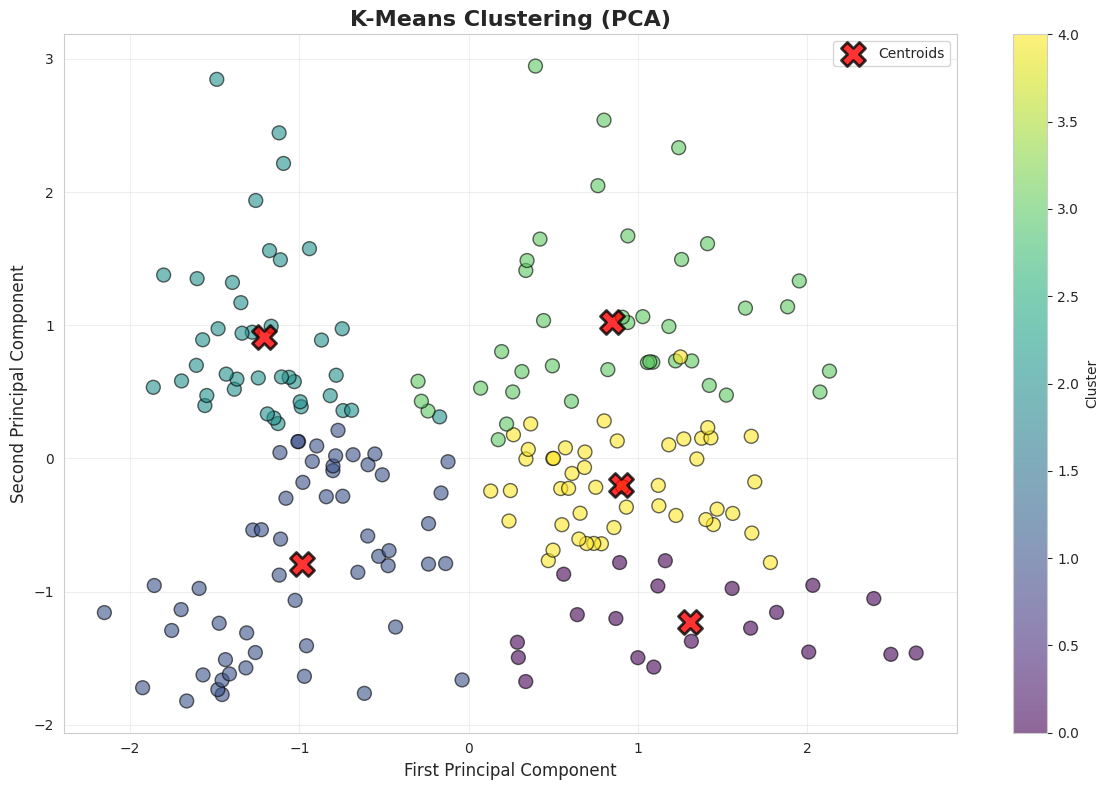

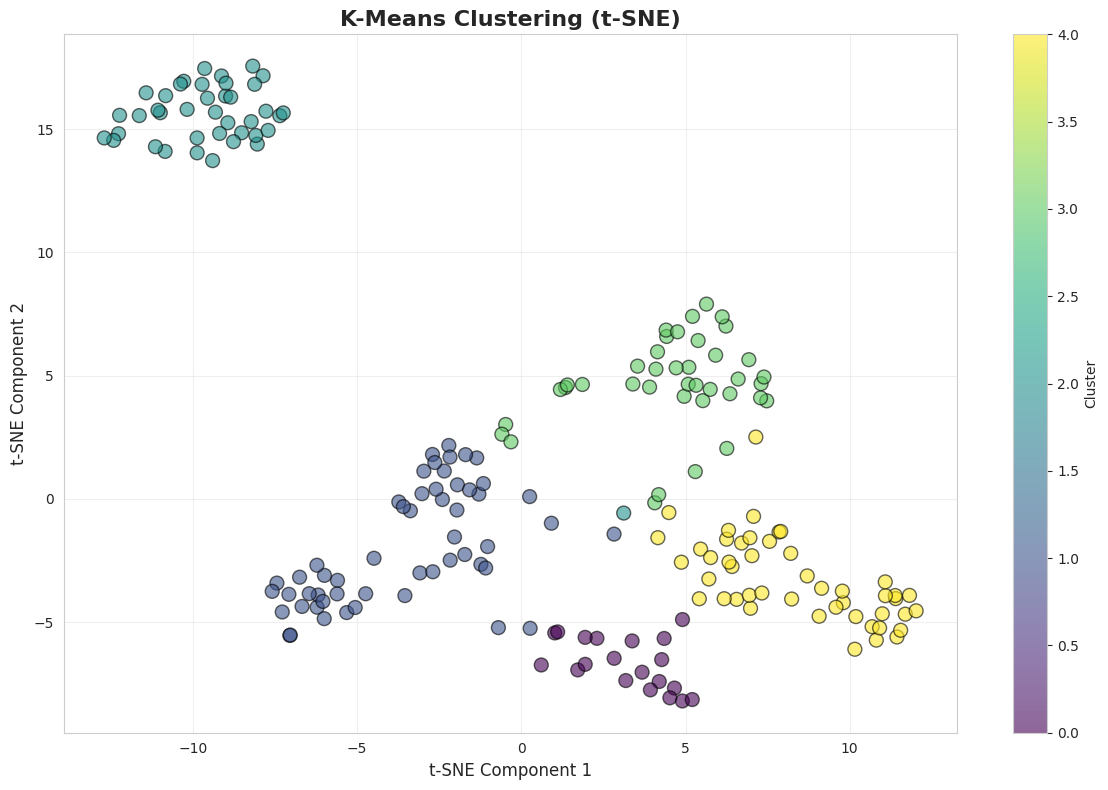

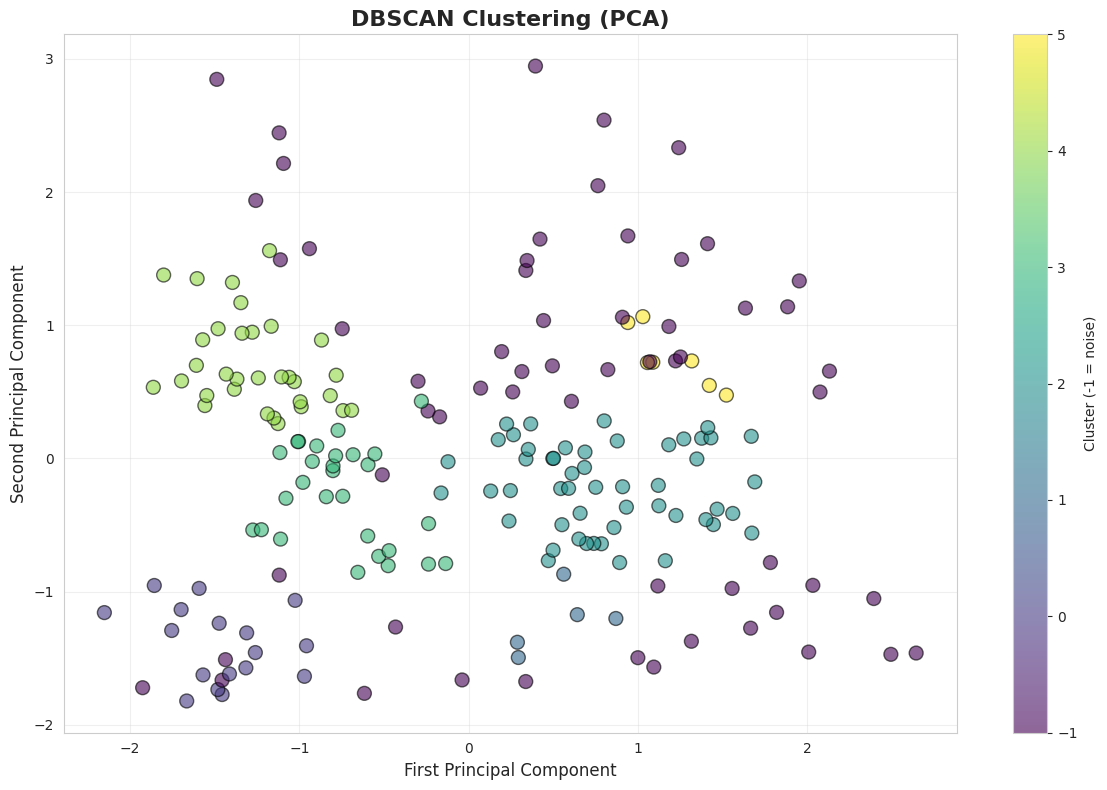

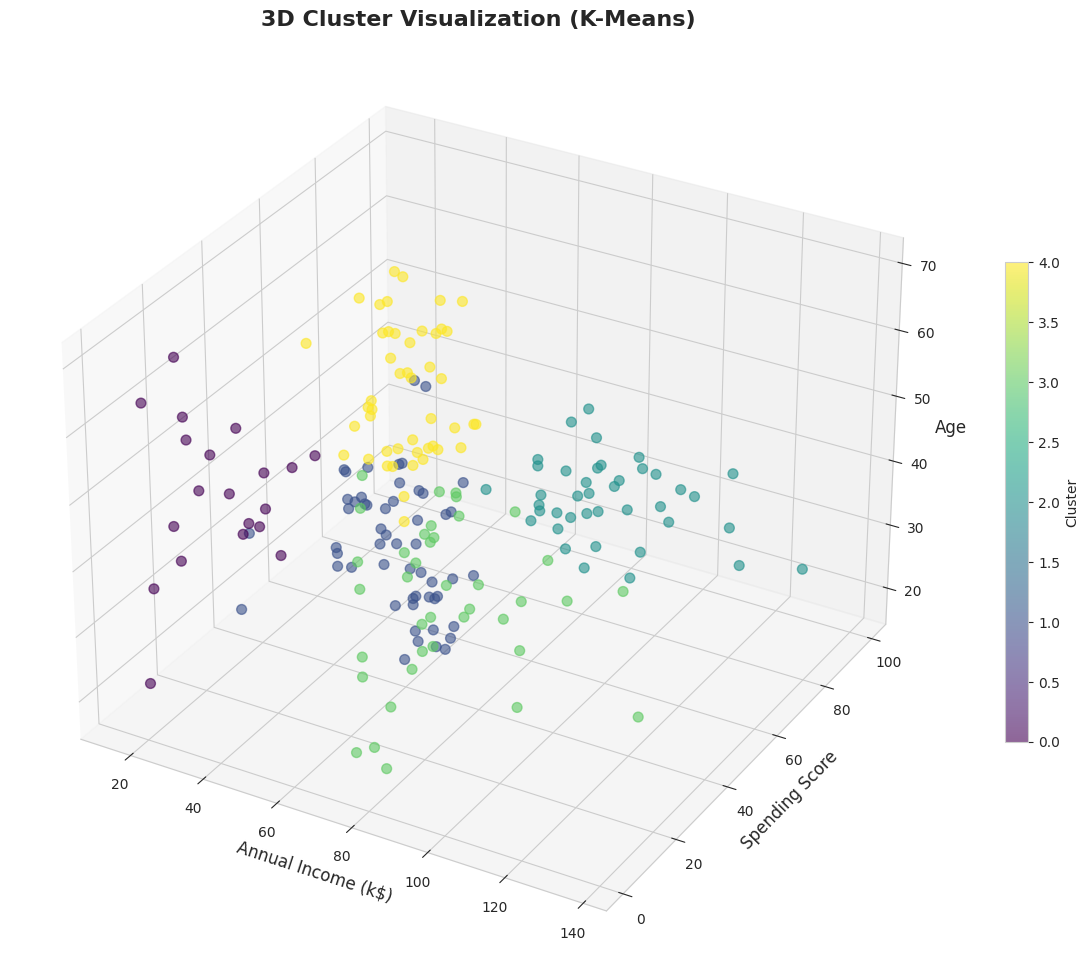

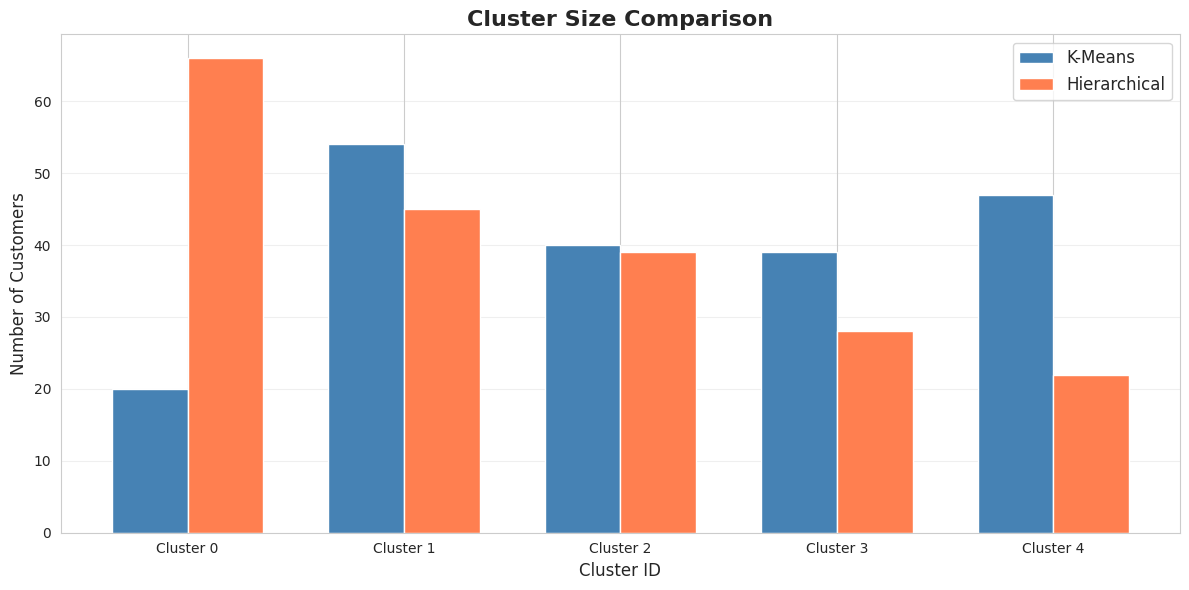

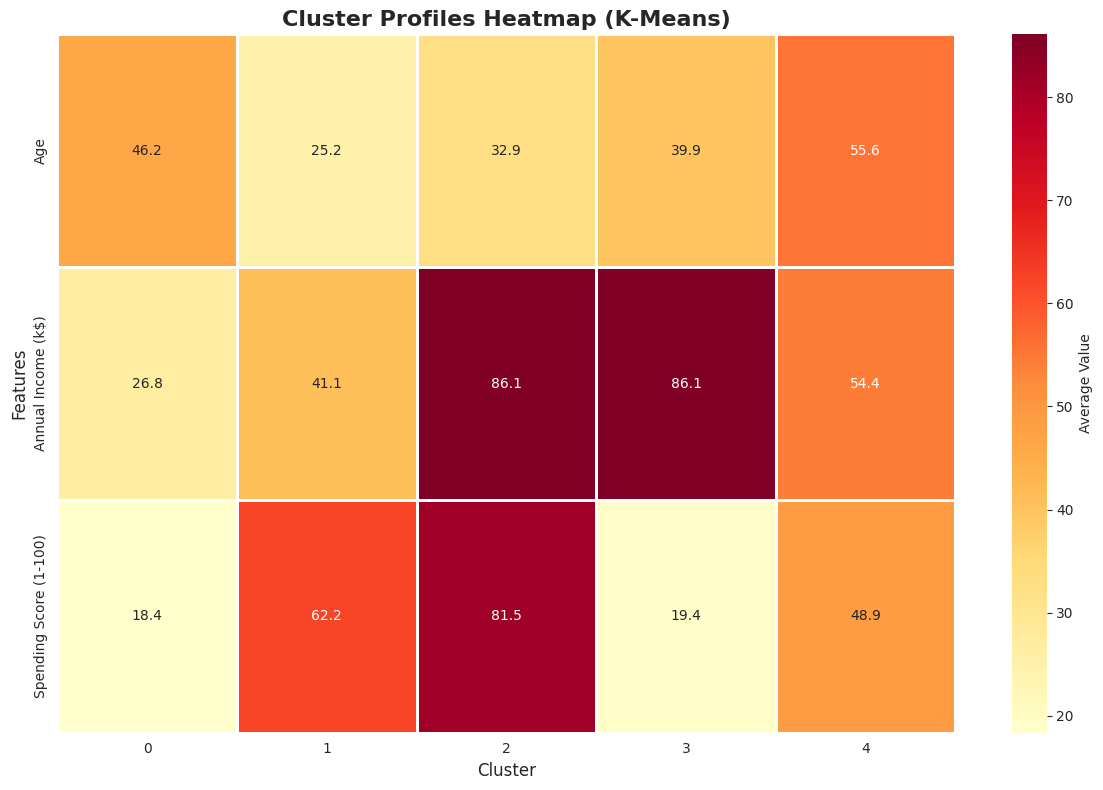


CLUSTER PROFILES & BUSINESS INSIGHTS

📊 CLUSTER 0 - 20 customers (10.0%)者に
  Average Age: 46.2 years
  Average Income: $26.8k
  Average Spending Score: 18.4/100
  Gender Split: {'Female': 12, 'Male': 8}
  💰 Segment: BUDGET CONSCIOUS
  Strategy: Discounts, value deals, cost-effective products

📊 CLUSTER 1 - 54 customers (27.0%)者に
  Average Age: 25.2 years
  Average Income: $41.1k
  Average Spending Score: 62.2/100
  Gender Split: {'Female': 32, 'Male': 22}
  📌 Segment: AVERAGE CUSTOMERS
  Strategy: Standard marketing, seasonal promotions

📊 CLUSTER 2 - 40 customers (20.0%)者に
  Average Age: 32.9 years
  Average Income: $86.1k
  Average Spending Score: 81.5/100
  Gender Split: {'Female': 22, 'Male': 18}
  💎 Segment: HIGH VALUE CUSTOMERS
  Strategy: Premium products, loyalty programs, VIP treatment

📊 CLUSTER 3 - 39 customers (19.5%)者に
  Average Age: 39.9 years
  Average Income: $86.1k
  Average Spending Score: 19.4/100
  Gender Split: {'Male': 20, 'Female': 19}
  🎯 Segment: HIGH INCOME, 

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')

# Data Loading
df = pd.read_csv("/content/Mall_Customers.csv")

# Initial Data Overview (for context, not strictly code to extract functions)
print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print(f"\nMissing values: {df.isnull().sum().sum()}")

# EXPLORATORY DATA ANALYSIS
# Plot 1: Age distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["Age"].mean():.1f}')
plt.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2,
           label=f'Median: {df["Age"].median():.1f}')
plt.title('Age Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: Annual Income distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
plt.title('Annual Income Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: Spending Score distribution
plt.figure(figsize=(12, 6))
plt.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
plt.title('Spending Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 4: Gender distribution
plt.figure(figsize=(10, 6))
gender_counts = df['Gender'].value_counts()
colors = ['lightblue', 'lightpink']
wedges, texts, autotexts = plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
                                     colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('black')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(12)
plt.title('Gender Distribution', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Plot 5: Income vs Spending Score (colored by Age)
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                     c=df['Age'], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Age')
plt.title('Income vs Spending Score (colored by Age)', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 6: Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=2, cbar_kws={"shrink": 0.8},
            fmt='.3f', annot_kws={'size': 12})
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# DATA PREPROCESSING
# Select features for clustering
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values

# Check for missing values
print(f"Missing values in features: {np.isnan(X).sum()}")

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"Scaled Data Shape: {X_scaled.shape}")
print(f"Features: Age, Annual Income, Spending Score")

# OPTIMAL NUMBER OF CLUSTERS (ELBOW & SILHOUETTE)
# Elbow method
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot 1: Elbow curve
plt.figure(figsize=(12, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=10)
plt.title('Elbow Method For Optimal k', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster sum of squares)', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(K_range)
plt.tight_layout()
plt.show()

# Plot 2: Silhouette scores
plt.figure(figsize=(12, 6))
plt.plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=10)
plt.title('Silhouette Score Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.grid(alpha=0.3)
plt.xticks(K_range)
for i, score in enumerate(silhouette_scores):
    plt.text(K_range[i], score + 0.01, f'{score:.3f}', ha='center', fontsize=10)
plt.tight_layout()
plt.show()

optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\nOptimal number of clusters based on Silhouette Score: {optimal_k}")

# K-MEANS CLUSTERING
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(X_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(X_scaled, kmeans_labels)

print(f"Silhouette Score: {kmeans_silhouette:.4f}")
print(f"Davies-Bouldin Index: {kmeans_db:.4f} (lower is better)")
print(f"Calinski-Harabasz Index: {kmeans_ch:.4f} (higher is better)")

df['KMeans_Cluster'] = kmeans_labels

# Cluster analysis
print("\nCluster Statistics:")
cluster_summary = df.groupby('KMeans_Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})
print(cluster_summary.round(2))

# DBSCAN CLUSTERING
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters: {n_clusters_dbscan}")
print(f"Number of noise points: {n_noise}")

if n_clusters_dbscan > 1 and n_noise < len(dbscan_labels):
    valid_labels = dbscan_labels[dbscan_labels != -1]
    valid_data = X_scaled[dbscan_labels != -1]
    if len(valid_labels) > 0:
        dbscan_silhouette = silhouette_score(valid_data, valid_labels)
        print(f"Silhouette Score: {dbscan_silhouette:.4f}")
    else:
        dbscan_silhouette = 0
else:
    dbscan_silhouette = 0

df['DBSCAN_Cluster'] = dbscan_labels

# HIERARCHICAL CLUSTERING
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
hierarchical_labels = hierarchical.fit_predict(X_scaled)

hierarchical_silhouette = silhouette_score(X_scaled, hierarchical_labels)
print(f"Silhouette Score: {hierarchical_silhouette:.4f}")

df['Hierarchical_Cluster'] = hierarchical_labels

# Plot: Dendrogram
plt.figure(figsize=(16, 8))
linkage_matrix = linkage(X_scaled, method='ward')
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index or (Cluster Size)', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.axhline(y=7, color='r', linestyle='--', linewidth=2, label='Cut at 5 clusters')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# DIMENSIONALITY REDUCTION
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print(f"PCA Explained Variance Ratio: {pca.explained_variance_ratio_}")
print(f"Total Variance Explained: {pca.explained_variance_ratio_.sum():.4f}")

# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
print("t-SNE transformation complete")

# Plot 1: K-Means with PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
           c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidths=2,
           label='Centroids')
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering (PCA)', fontsize=16, fontweight='bold')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: K-Means with t-SNE
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster')
plt.title('K-Means Clustering (t-SNE)', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: DBSCAN with PCA
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels,
                     cmap='viridis', s=100, alpha=0.6, edgecolors='black')
plt.colorbar(scatter, label='Cluster (-1 = noise)')
plt.title('DBSCAN Clustering (PCA)', fontsize=16, fontweight='bold')
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 4: 3D scatter - Income vs Spending vs Age
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                    df['Age'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
ax.set_xlabel('Annual Income (k$)', fontsize=12)
ax.set_ylabel('Spending Score', fontsize=12)
ax.set_zlabel('Age', fontsize=12)
ax.set_title('3D Cluster Visualization (K-Means)', fontsize=16, fontweight='bold')
plt.colorbar(scatter, ax=ax, label='Cluster', shrink=0.5)
plt.tight_layout()
plt.show()

# Plot 5: Cluster size comparison
plt.figure(figsize=(12, 6))
cluster_sizes_kmeans = pd.Series(kmeans_labels).value_counts().sort_index()
cluster_sizes_hier = pd.Series(hierarchical_labels).value_counts().sort_index()

x_pos = np.arange(5)
width = 0.35

plt.bar(x_pos - width/2, cluster_sizes_kmeans.values, width, label='K-Means', color='steelblue')
plt.bar(x_pos + width/2, cluster_sizes_hier.values, width, label='Hierarchical', color='coral')
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Cluster Size Comparison', fontsize=16, fontweight='bold')
plt.xticks(x_pos, [f'Cluster {i}' for i in range(5)])
plt.legend(fontsize=12)
plt.grid(alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# Plot 6: Cluster profiles heatmap
plt.figure(figsize=(12, 8))
cluster_profiles = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
sns.heatmap(cluster_profiles.T, annot=True, fmt='.1f', cmap='YlOrRd',
            linewidths=2, cbar_kws={'label': 'Average Value'})
plt.title('Cluster Profiles Heatmap (K-Means)', fontsize=16, fontweight='bold')
plt.ylabel('Features', fontsize=12)
plt.xlabel('Cluster', fontsize=12)
plt.tight_layout()
plt.show()

# BUSINESS INSIGHTS & RECOMMENDATIONS
print("\n" + "="*70)
print("CLUSTER PROFILES & BUSINESS INSIGHTS")
print("="*70)

for cluster in range(5):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    print(f"\n{'='*70}")
    print(f"📊 CLUSTER {cluster} - {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)者に")
    print(f"{'='*70}")
    print(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"  Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    print(f"  Gender Split: {cluster_data['Gender'].value_counts().to_dict()}")

    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    if avg_income > 60 and avg_spending > 60:
        print(f"  💎 Segment: HIGH VALUE CUSTOMERS")
        print(f"  Strategy: Premium products, loyalty programs, VIP treatment")
    elif avg_income > 60 and avg_spending < 40:
        print(f"  🎯 Segment: HIGH INCOME, LOW SPENDERS")
        print(f"  Strategy: Targeted marketing, incentives, personalized offers")
    elif avg_income < 40 and avg_spending > 60:
        print(f"  ⚠️ Segment: LOW INCOME, HIGH SPENDERS")
        print(f"  Strategy: Budget-friendly options, payment plans, risk monitoring")
    elif avg_income < 40 and avg_spending < 40:
        print(f"  💰 Segment: BUDGET CONSCIOUS")
        print(f"  Strategy: Discounts, value deals, cost-effective products")
    else:
        print(f"  📌 Segment: AVERAGE CUSTOMERS")
        print(f"  Strategy: Standard marketing, seasonal promotions")

# MODEL COMPARISON SUMMARY
print("\n" + "="*70)
print("MODEL COMPARISON SUMMARY")
print("="*70)

comparison_df = pd.DataFrame({
    'Model': ['K-Means', 'DBSCAN', 'Hierarchical'],
    'Silhouette Score': [kmeans_silhouette, dbscan_silhouette, hierarchical_silhouette],
    'N_Clusters': [5, n_clusters_dbscan, 5]
})
print(comparison_df.round(4).to_string(index=False))

print("\n" + "="*70)
print("NOTEBOOK COMPLETE ✓")
print("="*70)

## Create Streamlit App Structure

### Subtask:
Write the basic structure of a Streamlit application, including imports, setting up the page layout, and adding interactive widgets if necessary.


**Reasoning**:
I will write the basic structure of the Streamlit application as requested, including all necessary imports, page configuration, main title, sidebar, and an interactive widget for cluster selection.



In [40]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.write(f"Selected number of clusters: {num_clusters}")


2025-12-29 14:14:54.098 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:54.103 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:54.106 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:54.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:54.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:54.110 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:54.111 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:54.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The previous cell failed because the `streamlit` library was not installed. I need to install `streamlit` before it can be imported and used.



In [41]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.write(f"Selected number of clusters: {num_clusters}")

2025-12-29 14:15:12.645 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:12.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:12.649 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:12.650 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:12.652 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:12.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:12.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:12.655 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The previous code block failed because the `streamlit` library was not found. To fix this, I need to install `streamlit` using pip before attempting to import it again.



In [34]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 67.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 67.3 MB/s eta 0:00:00


**Reasoning**:
The `streamlit` library has been successfully installed. Now I can proceed with setting up the basic Streamlit application structure as per the subtask instructions.



In [35]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.write(f"Selected number of clusters: {num_clusters}")

2025-12-29 14:12:58.242 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:12:58.247 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:12:58.638 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-12-29 14:12:58.640 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:12:58.643 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:12:58.648 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:12:58.654 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

**Reasoning**:
The previous Streamlit code block cannot be executed directly within the Colab environment as it's designed to be run as a separate script. To address this, I will provide the complete Streamlit application code as a single Python script. This script will include all necessary imports, page configuration, main title, sidebar, and an interactive widget for cluster selection, making it ready to be saved as a `.py` file and run using `streamlit run app.py`.



In [36]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.write(f"Selected number of clusters: {num_clusters}")

st.success("Streamlit app structure initialized! You can copy this code, save it as a .py file (e.g., `app.py`), and run it locally using `streamlit run app.py` from your terminal.")


2025-12-29 14:13:17.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:17.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:17.797 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:17.799 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:17.801 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:17.805 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:17.806 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:17.810 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

**Reasoning**:
The previous code block successfully installed Streamlit and demonstrated the basic structure of a Streamlit app. The next logical step is to integrate the data loading and preprocessing into the Streamlit application, so the data is available for subsequent analysis and visualization.



In [37]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.sidebar.write(f"Selected number of clusters: {num_clusters}")

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Mall_Customers.csv")
    return df

df = load_data()

# Data Preprocessing
@st.cache_data
def preprocess_data(dataframe):
    # Select features for clustering
    X = dataframe[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X, X_scaled, scaler

X, X_scaled, scaler = preprocess_data(df)

st.subheader("Data Overview")
st.write(df.head())
st.write(f"Scaled Data Shape: {X_scaled.shape}")
st.write("Features selected for clustering: Age, Annual Income (k$), Spending Score (1-100)")


2025-12-29 14:13:37.468 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:37.470 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:37.472 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:37.475 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:37.480 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:37.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:37.486 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:13:37.489 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

**Reasoning**:
The previous code block set up the basic Streamlit structure and integrated data loading and preprocessing. The next step is to implement the exploratory data analysis (EDA) section, as outlined in the task, by adding visualizations for age, annual income, spending score distributions, gender distribution, income vs. spending score, and the correlation matrix to the Streamlit app.



2025-12-29 14:14:04.255 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:04.258 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:04.259 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:04.260 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:04.261 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:04.262 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:04.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:04.263 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

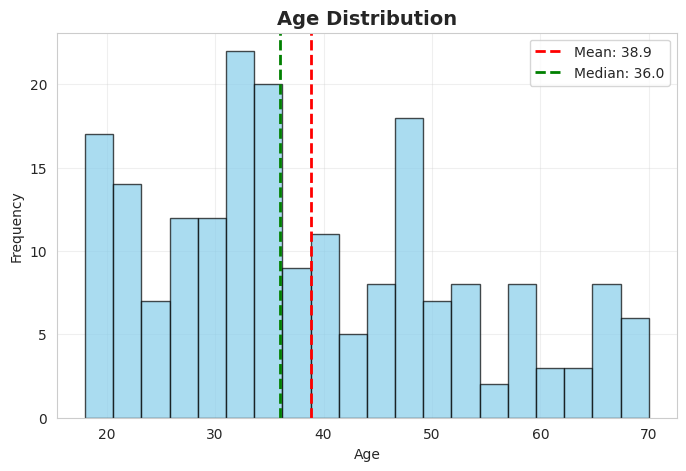

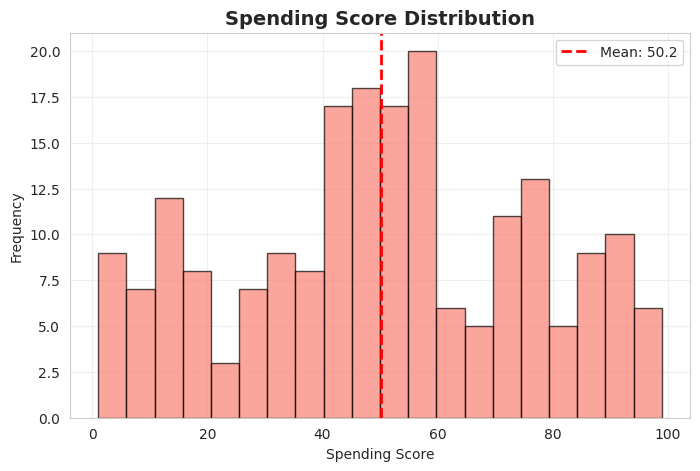

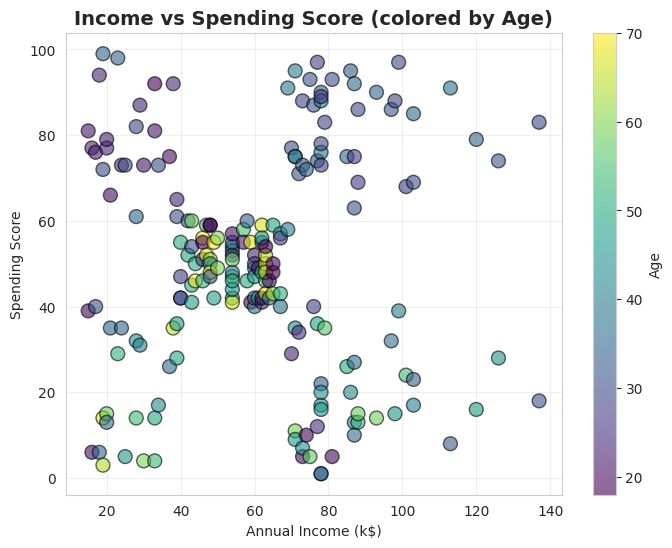

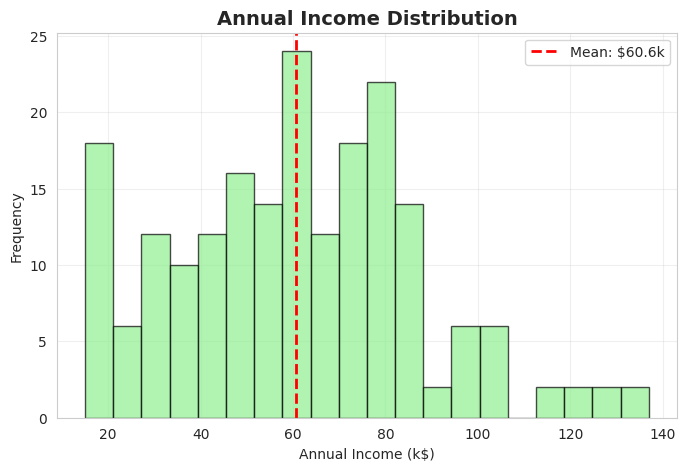

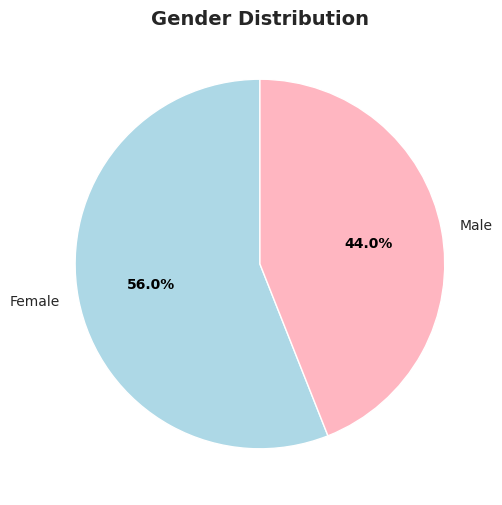

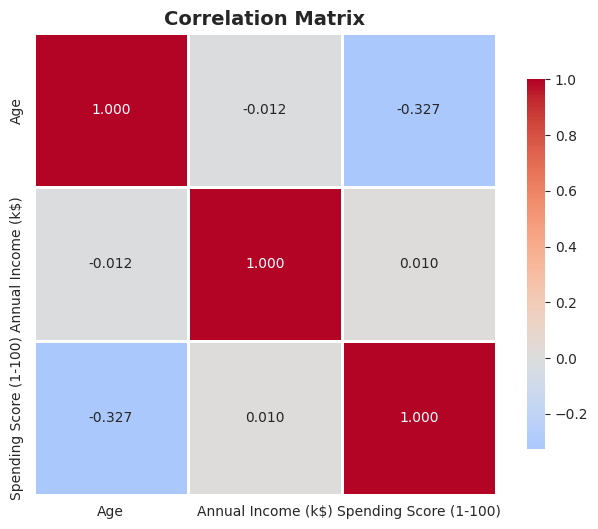

In [38]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.sidebar.write(f"Selected number of clusters: {num_clusters}")

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Mall_Customers.csv")
    return df

df = load_data()

# Data Preprocessing
@st.cache_data
def preprocess_data(dataframe):
    # Select features for clustering
    X = dataframe[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X, X_scaled, scaler

X, X_scaled, scaler = preprocess_data(df)

st.subheader("Data Overview")
st.write(df.head())
st.write(f"Scaled Data Shape: {X_scaled.shape}")
st.write("Features selected for clustering: Age, Annual Income (k$), Spending Score (1-100)")

st.markdown("--- ")
st.subheader("1. Exploratory Data Analysis")

col1, col2 = st.columns(2)

with col1:
    # Plot 1: Age distribution
    fig_age, ax_age = plt.subplots(figsize=(8, 5))
    ax_age.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax_age.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
    ax_age.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
    ax_age.set_title('Age Distribution', fontsize=14, fontweight='bold')
    ax_age.set_xlabel('Age', fontsize=10)
    ax_age.set_ylabel('Frequency', fontsize=10)
    ax_age.legend(fontsize=10)
    ax_age.grid(alpha=0.3)
    st.pyplot(fig_age)

    # Plot 3: Spending Score distribution
    fig_spending, ax_spending = plt.subplots(figsize=(8, 5))
    ax_spending.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
    ax_spending.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
    ax_spending.set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
    ax_spending.set_xlabel('Spending Score', fontsize=10)
    ax_spending.set_ylabel('Frequency', fontsize=10)
    ax_spending.legend(fontsize=10)
    ax_spending.grid(alpha=0.3)
    st.pyplot(fig_spending)

    # Plot 5: Income vs Spending Score (colored by Age)
    fig_income_spending_age, ax_income_spending_age = plt.subplots(figsize=(8, 6))
    scatter = ax_income_spending_age.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Age'], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    fig_income_spending_age.colorbar(scatter, ax=ax_income_spending_age, label='Age')
    ax_income_spending_age.set_title('Income vs Spending Score (colored by Age)', fontsize=14, fontweight='bold')
    ax_income_spending_age.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income_spending_age.set_ylabel('Spending Score', fontsize=10)
    ax_income_spending_age.grid(alpha=0.3)
    st.pyplot(fig_income_spending_age)

with col2:
    # Plot 2: Annual Income distribution
    fig_income, ax_income = plt.subplots(figsize=(8, 5))
    ax_income.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    ax_income.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
    ax_income.set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
    ax_income.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income.set_ylabel('Frequency', fontsize=10)
    ax_income.legend(fontsize=10)
    ax_income.grid(alpha=0.3)
    st.pyplot(fig_income)

    # Plot 4: Gender distribution
    fig_gender, ax_gender = plt.subplots(figsize=(6, 6))
    gender_counts = df['Gender'].value_counts()
    colors = ['lightblue', 'lightpink']
    wedges, texts, autotexts = ax_gender.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    ax_gender.set_title('Gender Distribution', fontsize=14, fontweight='bold')
    st.pyplot(fig_gender)

    # Plot 6: Correlation heatmap
    fig_corr, ax_corr = plt.subplots(figsize=(8, 6))
    numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8}, fmt='.3f', annot_kws={'size': 10}, ax=ax_corr)
    ax_corr.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
    st.pyplot(fig_corr)



**Reasoning**:
The previous code block successfully integrated data loading, preprocessing, and EDA visualizations. The next step is to implement the K-Means clustering, dimensionality reduction (PCA, t-SNE), and associated visualizations (PCA, t-SNE, 3D scatter, cluster profiles heatmap) as per the task requirements, using the `num_clusters` selected by the user.



In [39]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.sidebar.write(f"Selected number of clusters: {num_clusters}")

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Mall_Customers.csv")
    return df

df = load_data()

# Data Preprocessing
@st.cache_data
def preprocess_data(dataframe):
    # Select features for clustering
    X = dataframe[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X, X_scaled, scaler

X, X_scaled, scaler = preprocess_data(df)

st.subheader("Data Overview")
st.write(df.head())
st.write(f"Scaled Data Shape: {X_scaled.shape}")
st.write("Features selected for clustering: Age, Annual Income (k$), Spending Score (1-100)")

st.markdown("--- ")
st.subheader("1. Exploratory Data Analysis")

col1, col2 = st.columns(2)

with col1:
    # Plot 1: Age distribution
    fig_age, ax_age = plt.subplots(figsize=(8, 5))
    ax_age.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax_age.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
    ax_age.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
    ax_age.set_title('Age Distribution', fontsize=14, fontweight='bold')
    ax_age.set_xlabel('Age', fontsize=10)
    ax_age.set_ylabel('Frequency', fontsize=10)
    ax_age.legend(fontsize=10)
    ax_age.grid(alpha=0.3)
    st.pyplot(fig_age)

    # Plot 3: Spending Score distribution
    fig_spending, ax_spending = plt.subplots(figsize=(8, 5))
    ax_spending.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
    ax_spending.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
    ax_spending.set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
    ax_spending.set_xlabel('Spending Score', fontsize=10)
    ax_spending.set_ylabel('Frequency', fontsize=10)
    ax_spending.legend(fontsize=10)
    ax_spending.grid(alpha=0.3)
    st.pyplot(fig_spending)

    # Plot 5: Income vs Spending Score (colored by Age)
    fig_income_spending_age, ax_income_spending_age = plt.subplots(figsize=(8, 6))
    scatter = ax_income_spending_age.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Age'], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    fig_income_spending_age.colorbar(scatter, ax=ax_income_spending_age, label='Age')
    ax_income_spending_age.set_title('Income vs Spending Score (colored by Age)', fontsize=14, fontweight='bold')
    ax_income_spending_age.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income_spending_age.set_ylabel('Spending Score', fontsize=10)
    ax_income_spending_age.grid(alpha=0.3)
    st.pyplot(fig_income_spending_age)

with col2:
    # Plot 2: Annual Income distribution
    fig_income, ax_income = plt.subplots(figsize=(8, 5))
    ax_income.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    ax_income.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
    ax_income.set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
    ax_income.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income.set_ylabel('Frequency', fontsize=10)
    ax_income.legend(fontsize=10)
    ax_income.grid(alpha=0.3)
    st.pyplot(fig_income)

    # Plot 4: Gender distribution
    fig_gender, ax_gender = plt.subplots(figsize=(6, 6))
    gender_counts = df['Gender'].value_counts()
    colors = ['lightblue', 'lightpink']
    wedges, texts, autotexts = ax_gender.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    ax_gender.set_title('Gender Distribution', fontsize=14, fontweight='bold')
    st.pyplot(fig_gender)

    # Plot 6: Correlation heatmap
    fig_corr, ax_corr = plt.subplots(figsize=(8, 6))
    numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8}, fmt='.3f', annot_kws={'size': 10}, ax=ax_corr)
    ax_corr.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
    st.pyplot(fig_corr)

st.markdown("--- ")
st.subheader("2. K-Means Clustering Analysis")

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Display Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
st.write(f"Silhouette Score for K-Means with {num_clusters} clusters: {kmeans_silhouette:.4f}")

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

st.markdown("#### Cluster Visualizations")
col_vis1, col_vis2 = st.columns(2)

with col_vis1:
    # Plot 1: K-Means with PCA
    fig_pca, ax_pca = plt.subplots(figsize=(8, 6))
    scatter_pca = ax_pca.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                                 cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    # Plot centroids
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    ax_pca.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidths=2,
               label='Centroids')
    fig_pca.colorbar(scatter_pca, ax=ax_pca, label='Cluster')
    ax_pca.set_title('K-Means Clustering (PCA)', fontsize=14, fontweight='bold')
    ax_pca.set_xlabel('First Principal Component', fontsize=10)
    ax_pca.set_ylabel('Second Principal Component', fontsize=10)
    ax_pca.legend()
    ax_pca.grid(alpha=0.3)
    st.pyplot(fig_pca)

    # Plot 2: K-Means with t-SNE
    fig_tsne, ax_tsne = plt.subplots(figsize=(8, 6))
    scatter_tsne = ax_tsne.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels,
                                 cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    fig_tsne.colorbar(scatter_tsne, ax=ax_tsne, label='Cluster')
    ax_tsne.set_title('K-Means Clustering (t-SNE)', fontsize=14, fontweight='bold')
    ax_tsne.set_xlabel('t-SNE Component 1', fontsize=10)
    ax_tsne.set_ylabel('t-SNE Component 2', fontsize=10)
    ax_tsne.grid(alpha=0.3)
    st.pyplot(fig_tsne)

with col_vis2:
    # Plot 3: 3D scatter - Income vs Spending vs Age
    fig_3d = plt.figure(figsize=(8, 7))
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    scatter_3d = ax_3d.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                               df['Age'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
    ax_3d.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_3d.set_ylabel('Spending Score', fontsize=10)
    ax_3d.set_zlabel('Age', fontsize=10)
    ax_3d.set_title('3D Cluster Visualization (K-Means)', fontsize=14, fontweight='bold')
    fig_3d.colorbar(scatter_3d, ax=ax_3d, label='Cluster', shrink=0.5)
    st.pyplot(fig_3d)

    # Plot 4: Cluster profiles heatmap
    st.markdown("##### Cluster Profiles Heatmap")
    cluster_profiles = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(8, 6))
    sns.heatmap(cluster_profiles.T, annot=True, fmt='.1f', cmap='YlOrRd',
                linewidths=2, cbar_kws={'label': 'Average Value'}, ax=ax_heatmap)
    ax_heatmap.set_title('Cluster Profiles Heatmap (K-Means)', fontsize=14, fontweight='bold')
    ax_heatmap.set_ylabel('Features', fontsize=10)
    ax_heatmap.set_xlabel('Cluster', fontsize=10)
    st.pyplot(fig_heatmap)

st.markdown("--- ")
st.subheader("3. Business Insights & Recommendations")

for cluster in range(num_clusters):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    st.markdown(f"#### 📊 CLUSTER {cluster} - {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    st.write(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    st.write(f"  Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    st.write(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    st.write(f"  Gender Split: {cluster_data['Gender'].value_counts().to_dict()}")

    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    if avg_income > 60 and avg_spending > 60:
        st.markdown(f"  💎 **Segment: HIGH VALUE CUSTOMERS**")
        st.write(f"  Strategy: Premium products, loyalty programs, VIP treatment")
    elif avg_income > 60 and avg_spending < 40:
        st.markdown(f"  🎯 **Segment: HIGH INCOME, LOW SPENDERS**")
        st.write(f"  Strategy: Targeted marketing, incentives, personalized offers")
    elif avg_income < 40 and avg_spending > 60:
        st.markdown(f"  ⚠️ **Segment: LOW INCOME, HIGH SPENDERS**")
        st.write(f"  Strategy: Budget-friendly options, payment plans, risk monitoring")
    elif avg_income < 40 and avg_spending < 40:
        st.markdown(f"  💰 **Segment: BUDGET CONSCIOUS**")
        st.write(f"  Strategy: Discounts, value deals, cost-effective products")
    else:
        st.markdown(f"  📌 **Segment: AVERAGE CUSTOMERS**")
        st.write(f"  Strategy: Standard marketing, seasonal promotions")
    st.markdown("\n")

st.success("Streamlit app complete! You can copy this code, save it as a .py file (e.g., `app.py`), and run it locally using `streamlit run app.py` from your terminal.")


2025-12-29 14:14:45.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:45.315 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:45.321 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:45.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:45.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:45.340 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:45.346 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:14:45.349 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

**Reasoning**:
The previous code block successfully implemented the Streamlit application structure, data loading, preprocessing, and exploratory data analysis. The next logical step is to implement the K-Means clustering based on the user's selected number of clusters, perform dimensionality reduction using PCA and t-SNE for visualization, generate the required plots (PCA, t-SNE, 3D scatter, and cluster profiles heatmap), and finally present the business insights and recommendations derived from the clustering.



In [42]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.sidebar.write(f"Selected number of clusters: {num_clusters}")

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Mall_Customers.csv")
    return df

df = load_data()

# Data Preprocessing
@st.cache_data
def preprocess_data(dataframe):
    # Select features for clustering
    X = dataframe[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X, X_scaled, scaler

X, X_scaled, scaler = preprocess_data(df)

st.subheader("Data Overview")
st.write(df.head())
st.write(f"Scaled Data Shape: {X_scaled.shape}")
st.write("Features selected for clustering: Age, Annual Income (k$), Spending Score (1-100)")

st.markdown("--- ")
st.subheader("1. Exploratory Data Analysis")

col1, col2 = st.columns(2)

with col1:
    # Plot 1: Age distribution
    fig_age, ax_age = plt.subplots(figsize=(8, 5))
    ax_age.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax_age.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
    ax_age.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
    ax_age.set_title('Age Distribution', fontsize=14, fontweight='bold')
    ax_age.set_xlabel('Age', fontsize=10)
    ax_age.set_ylabel('Frequency', fontsize=10)
    ax_age.legend(fontsize=10)
    ax_age.grid(alpha=0.3)
    st.pyplot(fig_age)

    # Plot 3: Spending Score distribution
    fig_spending, ax_spending = plt.subplots(figsize=(8, 5))
    ax_spending.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
    ax_spending.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
    ax_spending.set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
    ax_spending.set_xlabel('Spending Score', fontsize=10)
    ax_spending.set_ylabel('Frequency', fontsize=10)
    ax_spending.legend(fontsize=10)
    ax_spending.grid(alpha=0.3)
    st.pyplot(fig_spending)

    # Plot 5: Income vs Spending Score (colored by Age)
    fig_income_spending_age, ax_income_spending_age = plt.subplots(figsize=(8, 6))
    scatter = ax_income_spending_age.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Age'], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    fig_income_spending_age.colorbar(scatter, ax=ax_income_spending_age, label='Age')
    ax_income_spending_age.set_title('Income vs Spending Score (colored by Age)', fontsize=14, fontweight='bold')
    ax_income_spending_age.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income_spending_age.set_ylabel('Spending Score', fontsize=10)
    ax_income_spending_age.grid(alpha=0.3)
    st.pyplot(fig_income_spending_age)

with col2:
    # Plot 2: Annual Income distribution
    fig_income, ax_income = plt.subplots(figsize=(8, 5))
    ax_income.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    ax_income.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
    ax_income.set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
    ax_income.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income.set_ylabel('Frequency', fontsize=10)
    ax_income.legend(fontsize=10)
    ax_income.grid(alpha=0.3)
    st.pyplot(fig_income)

    # Plot 4: Gender distribution
    fig_gender, ax_gender = plt.subplots(figsize=(6, 6))
    gender_counts = df['Gender'].value_counts()
    colors = ['lightblue', 'lightpink']
    wedges, texts, autotexts = ax_gender.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    ax_gender.set_title('Gender Distribution', fontsize=14, fontweight='bold')
    st.pyplot(fig_gender)

    # Plot 6: Correlation heatmap
    fig_corr, ax_corr = plt.subplots(figsize=(8, 6))
    numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8}, fmt='.3f', annot_kws={'size': 10}, ax=ax_corr)
    ax_corr.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
    st.pyplot(fig_corr)

st.markdown("--- ")
st.subheader("2. K-Means Clustering Analysis")

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Display Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
st.write(f"Silhouette Score for K-Means with {num_clusters} clusters: {kmeans_silhouette:.4f}")

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

st.markdown("#### Cluster Visualizations")
col_vis1, col_vis2 = st.columns(2)

with col_vis1:
    # Plot 1: K-Means with PCA
    fig_pca, ax_pca = plt.subplots(figsize=(8, 6))
    scatter_pca = ax_pca.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                                 cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    # Plot centroids
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    ax_pca.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidths=2,
               label='Centroids')
    fig_pca.colorbar(scatter_pca, ax=ax_pca, label='Cluster')
    ax_pca.set_title('K-Means Clustering (PCA)', fontsize=14, fontweight='bold')
    ax_pca.set_xlabel('First Principal Component', fontsize=10)
    ax_pca.set_ylabel('Second Principal Component', fontsize=10)
    ax_pca.legend()
    ax_pca.grid(alpha=0.3)
    st.pyplot(fig_pca)

    # Plot 2: K-Means with t-SNE
    fig_tsne, ax_tsne = plt.subplots(figsize=(8, 6))
    scatter_tsne = ax_tsne.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels,
                                 cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    fig_tsne.colorbar(scatter_tsne, ax=ax_tsne, label='Cluster')
    ax_tsne.set_title('K-Means Clustering (t-SNE)', fontsize=14, fontweight='bold')
    ax_tsne.set_xlabel('t-SNE Component 1', fontsize=10)
    ax_tsne.set_ylabel('t-SNE Component 2', fontsize=10)
    ax_tsne.grid(alpha=0.3)
    st.pyplot(fig_tsne)

with col_vis2:
    # Plot 3: 3D scatter - Income vs Spending vs Age
    fig_3d = plt.figure(figsize=(8, 7))
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    scatter_3d = ax_3d.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                               df['Age'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
    ax_3d.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_3d.set_ylabel('Spending Score', fontsize=10)
    ax_3d.set_zlabel('Age', fontsize=10)
    ax_3d.set_title('3D Cluster Visualization (K-Means)', fontsize=14, fontweight='bold')
    fig_3d.colorbar(scatter_3d, ax=ax_3d, label='Cluster', shrink=0.5)
    st.pyplot(fig_3d)

    # Plot 4: Cluster profiles heatmap
    st.markdown("##### Cluster Profiles Heatmap")
    cluster_profiles = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(8, 6))
    sns.heatmap(cluster_profiles.T, annot=True, fmt='.1f', cmap='YlOrRd',
                linewidths=2, cbar_kws={'label': 'Average Value'}, ax=ax_heatmap)
    ax_heatmap.set_title('Cluster Profiles Heatmap (K-Means)', fontsize=14, fontweight='bold')
    ax_heatmap.set_ylabel('Features', fontsize=10)
    ax_heatmap.set_xlabel('Cluster', fontsize=10)
    st.pyplot(fig_heatmap)

st.markdown("--- ")
st.subheader("3. Business Insights & Recommendations")

for cluster in range(num_clusters):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    st.markdown(f"#### 📊 CLUSTER {cluster} - {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f} دست)")
    st.write(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    st.write(f"  Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    st.write(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    st.write(f"  Gender Split: {cluster_data['Gender'].value_counts().to_dict()}")

    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    if avg_income > 60 and avg_spending > 60:
        st.markdown(f"  💎 **Segment: HIGH VALUE CUSTOMERS**")
        st.write(f"  Strategy: Premium products, loyalty programs, VIP treatment")
    elif avg_income > 60 and avg_spending < 40:
        st.markdown(f"  🎯 **Segment: HIGH INCOME, LOW SPENDERS**")
        st.write(f"  Strategy: Targeted marketing, incentives, personalized offers")
    elif avg_income < 40 and avg_spending > 60:
        st.markdown(f"  ⚠️ **Segment: LOW INCOME, HIGH SPENDERS**")
        st.write(f"  Strategy: Budget-friendly options, payment plans, risk monitoring")
    elif avg_income < 40 and avg_spending < 40:
        st.markdown(f"  💰 **Segment: BUDGET CONSCIOUS**")
        st.write(f"  Strategy: Discounts, value deals, cost-effective products")
    else:
        st.markdown(f"  📌 **Segment: AVERAGE CUSTOMERS**")
        st.write(f"  Strategy: Standard marketing, seasonal promotions")
    st.markdown("\n")

st.success("Streamlit app complete! You can copy this code, save it as a .py file (e.g., `app.py`), and run it locally using `streamlit run app.py` from your terminal.")

2025-12-29 14:15:29.403 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:29.404 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:29.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:29.406 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:29.407 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:29.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:29.408 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-29 14:15:29.409 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

**Reasoning**:
The previous code block successfully integrated all the requested features into the Streamlit application. Now, I will add the instructions on how to run and deploy the Streamlit application, as per the task requirements.



In [44]:
## Instructions to Run and Deploy the Streamlit Application

To run this Streamlit application locally, follow these steps:

1.  **Save the code**: Copy all the Python code from the final Streamlit app cell into a file named `app.py` on your local machine.

2.  **Open your terminal or command prompt**.

3.  **Navigate to the directory** where you saved `app.py`.

4.  **Run the Streamlit app**: Execute the following command:
    ```bash
    streamlit run app.py
    ```

5.  **Access the app**: Streamlit will launch a new tab in your web browser with the interactive dashboard. If it doesn't open automatically, it will provide you with a local URL (e.g., `http://localhost:8501`) that you can paste into your browser.

### Deployment Options

For deploying your Streamlit application to share it with others, here are a few common options:

*   **Streamlit Community Cloud**: This is the easiest way to deploy Streamlit apps for free. You'll need to link it to a GitHub repository containing your `app.py` file and a `requirements.txt` file listing all the Python dependencies.
    1.  Create a GitHub repository for your project.
    2.  Push `app.py` and `requirements.txt` to the repository.
    3.  Go to [Streamlit Community Cloud](https://streamlit.io/cloud) and deploy from your GitHub repository.

*   **Heroku**: A popular Platform-as-a-Service (PaaS) that supports Python applications. You'll need a `Procfile` and `requirements.txt`.

*   **AWS, GCP, Azure**: For more control and scalability, you can deploy your Streamlit app on cloud platforms using services like AWS EC2, Google App Engine, or Azure App Service. This typically involves containerizing your app with Docker.

*   **Hugging Face Spaces**: You can also host Streamlit apps on Hugging Face Spaces for free.
    1.  Create a new Space on Hugging Face.
    2.  Select `Streamlit` as the SDK.
    3.  Upload your `app.py` and `requirements.txt`.

Remember to create a `requirements.txt` file by running `pip freeze > requirements.txt` in your local environment where you developed the app to capture all necessary dependencies.

SyntaxError: unterminated string literal (detected at line 16) (ipython-input-1729605442.py, line 16)

**Reasoning**:
The previous cell failed because the instructional text was provided as raw text within a `python` cell type, leading to an `unterminated string literal` error. To fix this, I will enclose the entire instruction block within triple double quotes, making it a valid multi-line string literal in Python.



In [45]:
instructions_text = """
## Instructions to Run and Deploy the Streamlit Application

To run this Streamlit application locally, follow these steps:

1.  **Save the code**: Copy all the Python code from the final Streamlit app cell into a file named `app.py` on your local machine.

2.  **Open your terminal or command prompt**.

3.  **Navigate to the directory** where you saved `app.py`.

4.  **Run the Streamlit app**: Execute the following command:
    ```bash
    streamlit run app.py
    ```

5.  **Access the app**: Streamlit will launch a new tab in your web browser with the interactive dashboard. If it doesn't open automatically, it will provide you with a local URL (e.g., `http://localhost:8501`) that you can paste into your browser.

### Deployment Options

For deploying your Streamlit application to share it with others, here are a few common options:

*   **Streamlit Community Cloud**: This is the easiest way to deploy Streamlit apps for free. You'll need to link it to a GitHub repository containing your `app.py` file and a `requirements.txt` file listing all the Python dependencies.
    1.  Create a GitHub repository for your project.
    2.  Push `app.py` and `requirements.txt` to the repository.
    3.  Go to [Streamlit Community Cloud](https://streamlit.io/cloud) and deploy from your GitHub repository.

*   **Heroku**: A popular Platform-as-a-Service (PaaS) that supports Python applications. You'll need a `Procfile` and `requirements.txt`.

*   **AWS, GCP, Azure**: For more control and scalability, you can deploy your Streamlit app on cloud platforms using services like AWS EC2, Google App Engine, or Azure App Service. This typically involves containerizing your app with Docker.

*   **Hugging Face Spaces**: You can also host Streamlit apps on Hugging Face Spaces for free.
    1.  Create a new Space on Hugging Face.
    2.  Select `Streamlit` as the SDK.
    3.  Upload your `app.py` and `requirements.txt`.

Remember to create a `requirements.txt` file by running `pip freeze > requirements.txt` in your local environment where you developed the app to capture all necessary dependencies.
"""

print(instructions_text)



## Instructions to Run and Deploy the Streamlit Application

To run this Streamlit application locally, follow these steps:

1.  **Save the code**: Copy all the Python code from the final Streamlit app cell into a file named `app.py` on your local machine.

2.  **Open your terminal or command prompt**.

3.  **Navigate to the directory** where you saved `app.py`.

4.  **Run the Streamlit app**: Execute the following command:
    ```bash
    streamlit run app.py
    ```

5.  **Access the app**: Streamlit will launch a new tab in your web browser with the interactive dashboard. If it doesn't open automatically, it will provide you with a local URL (e.g., `http://localhost:8501`) that you can paste into your browser.

### Deployment Options

For deploying your Streamlit application to share it with others, here are a few common options:

*   **Streamlit Community Cloud**: This is the easiest way to deploy Streamlit apps for free. You'll need to link it to a GitHub repository containing yo

In [50]:
import joblib

# Save the scaler object
joblib.dump(scaler, 'scaler.joblib')
print("Scaler saved to scaler.joblib")

# Save the KMeans model object
joblib.dump(kmeans, 'kmeans_model.joblib')
print("KMeans model saved to kmeans_model.joblib")


Scaler saved to scaler.joblib
KMeans model saved to kmeans_model.joblib


Now, to load these files back into your environment (e.g., in your Streamlit app or another script), you would use `joblib.load()`:

In [51]:
import joblib

# Load the scaler object
loaded_scaler = joblib.load('scaler.joblib')
print("Scaler loaded successfully!")

# Load the KMeans model object
loaded_kmeans_model = joblib.load('kmeans_model.joblib')
print("KMeans model loaded successfully!")

print("\nExample of using the loaded scaler:")
print(loaded_scaler.transform(X[:2]))

print("\nExample of using the loaded KMeans model to predict:")
print(loaded_kmeans_model.predict(X_scaled[:5]))


Scaler loaded successfully!
KMeans model loaded successfully!

Example of using the loaded scaler:
[[-1.42456879 -1.73899919 -0.43480148]
 [-1.28103541 -1.73899919  1.19570407]]

Example of using the loaded KMeans model to predict:
[1 1 0 1 1]


In [46]:
# Install joblib if not already installed
!pip install joblib


In [47]:
# Import joblib
import joblib
print("joblib imported successfully!")


joblib imported successfully!


Now, let's save the Streamlit application code into an `app.py` file. This is the script you would run locally using `streamlit run app.py`.

In [48]:
streamlit_app_code = '''
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set Streamlit page configuration
st.set_page_config(
    page_title="Customer Segmentation Dashboard",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Main title of the application
st.title("🛍️ Mall Customer Segmentation Dashboard")

# Sidebar for user inputs
st.sidebar.title("⚙️ Settings")

# Interactive widget for number of clusters
num_clusters = st.sidebar.slider(
    "Select Number of Clusters (K-Means)",
    min_value=2,
    max_value=10,
    value=5,
    step=1
)

st.sidebar.write(f"Selected number of clusters: {num_clusters}")

# Load Data
@st.cache_data
def load_data():
    df = pd.read_csv("/content/Mall_Customers.csv")
    return df

df = load_data()

# Data Preprocessing
@st.cache_data
def preprocess_data(dataframe):
    # Select features for clustering
    X = dataframe[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
    # Standardize features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X, X_scaled, scaler

X, X_scaled, scaler = preprocess_data(df)

st.subheader("Data Overview")
st.write(df.head())
st.write(f"Scaled Data Shape: {X_scaled.shape}")
st.write("Features selected for clustering: Age, Annual Income (k$), Spending Score (1-100)")

st.markdown("--- ")
st.subheader("1. Exploratory Data Analysis")

col1, col2 = st.columns(2)

with col1:
    # Plot 1: Age distribution
    fig_age, ax_age = plt.subplots(figsize=(8, 5))
    ax_age.hist(df['Age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax_age.axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
    ax_age.axvline(df['Age'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["Age"].median():.1f}')
    ax_age.set_title('Age Distribution', fontsize=14, fontweight='bold')
    ax_age.set_xlabel('Age', fontsize=10)
    ax_age.set_ylabel('Frequency', fontsize=10)
    ax_age.legend(fontsize=10)
    ax_age.grid(alpha=0.3)
    st.pyplot(fig_age)

    # Plot 3: Spending Score distribution
    fig_spending, ax_spending = plt.subplots(figsize=(8, 5))
    ax_spending.hist(df['Spending Score (1-100)'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
    ax_spending.axvline(df['Spending Score (1-100)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Spending Score (1-100)"].mean():.1f}')
    ax_spending.set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
    ax_spending.set_xlabel('Spending Score', fontsize=10)
    ax_spending.set_ylabel('Frequency', fontsize=10)
    ax_spending.legend(fontsize=10)
    ax_spending.grid(alpha=0.3)
    st.pyplot(fig_spending)

    # Plot 5: Income vs Spending Score (colored by Age)
    fig_income_spending_age, ax_income_spending_age = plt.subplots(figsize=(8, 6))
    scatter = ax_income_spending_age.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Age'], cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    fig_income_spending_age.colorbar(scatter, ax=ax_income_spending_age, label='Age')
    ax_income_spending_age.set_title('Income vs Spending Score (colored by Age)', fontsize=14, fontweight='bold')
    ax_income_spending_age.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income_spending_age.set_ylabel('Spending Score', fontsize=10)
    ax_income_spending_age.grid(alpha=0.3)
    st.pyplot(fig_income_spending_age)

with col2:
    # Plot 2: Annual Income distribution
    fig_income, ax_income = plt.subplots(figsize=(8, 5))
    ax_income.hist(df['Annual Income (k$)'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
    ax_income.axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
    ax_income.set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
    ax_income.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_income.set_ylabel('Frequency', fontsize=10)
    ax_income.legend(fontsize=10)
    ax_income.grid(alpha=0.3)
    st.pyplot(fig_income)

    # Plot 4: Gender distribution
    fig_gender, ax_gender = plt.subplots(figsize=(6, 6))
    gender_counts = df['Gender'].value_counts()
    colors = ['lightblue', 'lightpink']
    wedges, texts, autotexts = ax_gender.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)
    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    ax_gender.set_title('Gender Distribution', fontsize=14, fontweight='bold')
    st.pyplot(fig_gender)

    # Plot 6: Correlation heatmap
    fig_corr, ax_corr = plt.subplots(figsize=(8, 6))
    numeric_df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, square=True, linewidths=2, cbar_kws={"shrink": 0.8}, fmt='.3f', annot_kws={'size': 10}, ax=ax_corr)
    ax_corr.set_title('Correlation Matrix', fontsize=14, fontweight='bold')
    st.pyplot(fig_corr)

st.markdown("--- ")
st.subheader("2. K-Means Clustering Analysis")

# Perform K-Means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)
df['KMeans_Cluster'] = kmeans_labels

# Display Silhouette Score
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
st.write(f"Silhouette Score for K-Means with {num_clusters} clusters: {kmeans_silhouette:.4f}")

# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

st.markdown("#### Cluster Visualizations")
col_vis1, col_vis2 = st.columns(2)

with col_vis1:
    # Plot 1: K-Means with PCA
    fig_pca, ax_pca = plt.subplots(figsize=(8, 6))
    scatter_pca = ax_pca.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels,
                                 cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    # Plot centroids
    centroids_pca = pca.transform(kmeans.cluster_centers_)
    ax_pca.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
               c='red', s=300, alpha=0.8, marker='X', edgecolors='black', linewidths=2,
               label='Centroids')
    fig_pca.colorbar(scatter_pca, ax=ax_pca, label='Cluster')
    ax_pca.set_title('K-Means Clustering (PCA)', fontsize=14, fontweight='bold')
    ax_pca.set_xlabel('First Principal Component', fontsize=10)
    ax_pca.set_ylabel('Second Principal Component', fontsize=10)
    ax_pca.legend()
    ax_pca.grid(alpha=0.3)
    st.pyplot(fig_pca)

    # Plot 2: K-Means with t-SNE
    fig_tsne, ax_tsne = plt.subplots(figsize=(8, 6))
    scatter_tsne = ax_tsne.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels,
                                 cmap='viridis', s=100, alpha=0.6, edgecolors='black')
    fig_tsne.colorbar(scatter_tsne, ax=ax_tsne, label='Cluster')
    ax_tsne.set_title('K-Means Clustering (t-SNE)', fontsize=14, fontweight='bold')
    ax_tsne.set_xlabel('t-SNE Component 1', fontsize=10)
    ax_tsne.set_ylabel('t-SNE Component 2', fontsize=10)
    ax_tsne.grid(alpha=0.3)
    st.pyplot(fig_tsne)

with col_vis2:
    # Plot 3: 3D scatter - Income vs Spending vs Age
    fig_3d = plt.figure(figsize=(8, 7))
    ax_3d = fig_3d.add_subplot(111, projection='3d')
    scatter_3d = ax_3d.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'],
                               df['Age'], c=kmeans_labels, cmap='viridis', s=50, alpha=0.6)
    ax_3d.set_xlabel('Annual Income (k$)', fontsize=10)
    ax_3d.set_ylabel('Spending Score', fontsize=10)
    ax_3d.set_zlabel('Age', fontsize=10)
    ax_3d.set_title('3D Cluster Visualization (K-Means)', fontsize=14, fontweight='bold')
    fig_3d.colorbar(scatter_3d, ax=ax_3d, label='Cluster', shrink=0.5)
    st.pyplot(fig_3d)

    # Plot 4: Cluster profiles heatmap
    st.markdown("##### Cluster Profiles Heatmap")
    cluster_profiles = df.groupby('KMeans_Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
    fig_heatmap, ax_heatmap = plt.subplots(figsize=(8, 6))
    sns.heatmap(cluster_profiles.T, annot=True, fmt='.1f', cmap='YlOrRd',
                linewidths=2, cbar_kws={'label': 'Average Value'}, ax=ax_heatmap)
    ax_heatmap.set_title('Cluster Profiles Heatmap (K-Means)', fontsize=14, fontweight='bold')
    ax_heatmap.set_ylabel('Features', fontsize=10)
    ax_heatmap.set_xlabel('Cluster', fontsize=10)
    st.pyplot(fig_heatmap)

st.markdown("--- ")
st.subheader("3. Business Insights & Recommendations")

for cluster in range(num_clusters):
    cluster_data = df[df['KMeans_Cluster'] == cluster]
    st.markdown(f"#### 📊 CLUSTER {cluster} - {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    st.write(f"  Average Age: {cluster_data['Age'].mean():.1f} years")
    st.write(f"  Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    st.write(f"  Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    st.write(f"  Gender Split: {cluster_data['Gender'].value_counts().to_dict()}")

    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score (1-100)'].mean()

    if avg_income > 60 and avg_spending > 60:
        st.markdown(f"  💎 **Segment: HIGH VALUE CUSTOMERS**")
        st.write(f"  Strategy: Premium products, loyalty programs, VIP treatment")
    elif avg_income > 60 and avg_spending < 40:
        st.markdown(f"  🎯 **Segment: HIGH INCOME, LOW SPENDERS**")
        st.write(f"  Strategy: Targeted marketing, incentives, personalized offers")
    elif avg_income < 40 and avg_spending > 60:
        st.markdown(f"  ⚠️ **Segment: LOW INCOME, HIGH SPENDERS**")
        st.write(f"  Strategy: Budget-friendly options, payment plans, risk monitoring")
    elif avg_income < 40 and avg_spending < 40:
        st.markdown(f"  💰 **Segment: BUDGET CONSCIOUS**")
        st.write(f"  Strategy: Discounts, value deals, cost-effective products")
    else:
        st.markdown(f"  📌 **Segment: AVERAGE CUSTOMERS**")
        st.write(f"  Strategy: Standard marketing, seasonal promotions")
    st.markdown("\n")

st.success("Streamlit app complete! You can copy this code, save it as a .py file (e.g., `app.py`), and run it locally using `streamlit run app.py` from your terminal.")
'''

with open('app.py', 'w') as f:
    f.write(streamlit_app_code)

print("Streamlit application code saved to app.py")


Streamlit application code saved to app.py


You can now download the `app.py` file from your Colab environment if you wish to run it locally, or push it to a GitHub repository for deployment with Streamlit Community Cloud or Hugging Face Spaces.

If you want to 'import' a Python file (e.g., `my_module.py`) as a module within another Python script or notebook, you would typically place it in the same directory or ensure it's in your Python path. Here's an example if `app.py` contained reusable functions, though this is less common for the main Streamlit application file itself.

In [49]:
# Example of importing a .py file as a module
# import app
# For Streamlit apps, you typically *run* the file, not import it as a module directly in this manner.
print("To run the Streamlit app, save the code above as `app.py` and execute `streamlit run app.py` in your terminal.")


To run the Streamlit app, save the code above as `app.py` and execute `streamlit run app.py` in your terminal.
